In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [567]:
df = pd.read_csv('/content/AAQoL.csv')

In [568]:
df.head()

Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0      80314   NaN     NaN    Vietnamese            NaN                  NaN   
1      60171  60.0    Male       Chinese        Married                 13.0   
2    1011601  23.0  Female       Chinese         Single                 16.0   
3      50046  73.0  Female       Chinese          Other                 13.0   
4      10494  29.0    Male  Asian Indian         Single                 17.0   

   Household Size              No One Spouse              Children  ...  \
0             NaN                 NaN    NaN                   NaN  ...   
1             6.0                   0      0  Living with children  ...   
2             3.0                   0      0                     0  ...   
3             1.0  Living with no one      0                     0  ...   
4             1.0  Living with no one      0                     0  ...   

  Acquaintances Heal Professionals  Mobile Apps Email  Social Networks  \
0           NaN                NaN          NaN   NaN              NaN   
1           NaN                NaN          NaN   NaN              NaN   
2            No                Yes           No    No               No   
3            No                Yes           No    No               No   
4           NaN                NaN          NaN   NaN              NaN   

  Online Communities  Health Website Other Quality of Life Satisfied With Life  
0                NaN             NaN   NaN             NaN                 NaN  
1                NaN             NaN   NaN             NaN                 NaN  
2                 No             Yes   0.0             8.0            Disagree  
3                 No             Yes   0.0             NaN                 NaN  
4                NaN             NaN   NaN             NaN                 NaN  

[5 rows x 72 columns]

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey ID                       2609 non-null   int64  
 1   Age                             2600 non-null   float64
 2   Gender                          2582 non-null   object 
 3   Ethnicity                       2607 non-null   object 
 4   Marital Status                  2591 non-null   object 
 5   Education Completed             2572 non-null   float64
 6   Household Size                  2592 non-null   float64
 7   No One                          2604 non-null   object 
 8   Spouse                          2604 non-null   object 
 9   Children                        2604 non-null   object 
 10  Grand Children                  2604 non-null   object 
 11  Parent                          2604 non-null   object 
 12  Grandparent                     25

In [570]:
missing_percentages = df.isnull().sum() * 100 / len(df)
missing_percentages = missing_percentages.sort_values(ascending=False)
missing_percentages

Occupation             30.471445
Religion               20.237639
Income                  7.780759
Achieving Ends Meet     6.094289
Folkmedicine            2.759678
                         ...    
Brother/Sister          0.191644
Friends                 0.191644
Ethnicity               0.076658
Language                0.076658
Survey ID               0.000000
Length: 72, dtype: float64

In [571]:
for col in df.columns:
    print(f"\nUnique values for {col}:")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Most frequent values:\n{df[col].value_counts(normalize=True).head()}")


Unique values for Survey ID:
Number of unique values: 2601
Most frequent values:
Survey ID
11029    0.000767
11036    0.000767
30052    0.000767
11025    0.000767
11078    0.000767
Name: proportion, dtype: float64

Unique values for Age:
Number of unique values: 73
Most frequent values:
Age
25.0    0.031923
32.0    0.029615
40.0    0.026923
30.0    0.026538
34.0    0.025385
Name: proportion, dtype: float64

Unique values for Gender:
Number of unique values: 2
Most frequent values:
Gender
Female    0.551898
Male      0.448102
Name: proportion, dtype: float64

Unique values for Ethnicity:
Number of unique values: 6
Most frequent values:
Ethnicity
Chinese         0.245109
Asian Indian    0.220176
Vietnamese      0.197161
Korean          0.180667
Filipino        0.101649
Name: proportion, dtype: float64

Unique values for Marital Status:
Number of unique values: 4
Most frequent values:
Marital Status
Married                  0.665766
Single                   0.280201
Living with a partner

In [572]:
df.columns

Index(['Survey ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Completed', 'Household Size', 'No One', 'Spouse', 'Children',
       'Grand Children', 'Parent', 'Grandparent', 'Brother/Sister',
       'Other Relative', 'Friends', 'Other ', 'Religion',
       'Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker',
       'Retired', 'Occupation', 'Income', 'Achieving Ends Meet', 'US Born',
       'Duration of Residency', 'Primary Language', 'English Speaking',
       'English Difficulties', 'Familiarity with America',
       'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging',
       'Present Health', 'Present Mental Health', 'Present Oral Health',
       'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise',
       'Healthy Diet', 'Hypertension', 'Diabetes', 'Arthritis',
       'Physical Check-up', 'Dentist Check-up', 'Urgentcare', 'Folkmedicine',
       'Primary Care', 'Health Insurance', 'Dental Insurance',
       'Unmet

In [573]:
df.columns = df.columns.str.strip()
df.columns

Index(['Survey ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Completed', 'Household Size', 'No One', 'Spouse', 'Children',
       'Grand Children', 'Parent', 'Grandparent', 'Brother/Sister',
       'Other Relative', 'Friends', 'Other', 'Religion',
       'Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker',
       'Retired', 'Occupation', 'Income', 'Achieving Ends Meet', 'US Born',
       'Duration of Residency', 'Primary Language', 'English Speaking',
       'English Difficulties', 'Familiarity with America',
       'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging',
       'Present Health', 'Present Mental Health', 'Present Oral Health',
       'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise',
       'Healthy Diet', 'Hypertension', 'Diabetes', 'Arthritis',
       'Physical Check-up', 'Dentist Check-up', 'Urgentcare', 'Folkmedicine',
       'Primary Care', 'Health Insurance', 'Dental Insurance',
       'Unmet 

In [574]:
df = df.drop(['Other'],axis=1)

In [575]:
df_analysis = df.copy()

In [576]:
col_living = ['No One','Spouse','Children','Grand Children','Brother/Sister','Other Relative','Grandparent','Parent','Friends']

for col in col_living:
    for value in df_analysis[col].unique():
        if value in [0,'0.0','0',0.0]:
            df_analysis.loc[df_analysis[col] == value, col] = 0
        else:
            df_analysis.loc[df_analysis[col] == value, col] = 1

col_job = ['Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker','Retired']

for col in col_job:
    for value in df[col].unique():
        if value in [0,'0.0','0',0.0]:
            df_analysis.loc[df_analysis[col] == value, col] = 0
        else:
            df_analysis.loc[df_analysis[col] == value, col] = 1

In [577]:
df_analysis = df_analysis.replace({'yes': 1,'Yes': 1, 'No': 0, 'no': 0})
df_analysis.head(20)

<ipython-input-577-e8d4902e1b89>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysis = df_analysis.replace({'yes': 1,'Yes': 1, 'No': 0, 'no': 0})


Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0       80314   NaN     NaN    Vietnamese            NaN                  NaN   
1       60171  60.0    Male       Chinese        Married                 13.0   
2     1011601  23.0  Female       Chinese         Single                 16.0   
3       50046  73.0  Female       Chinese          Other                 13.0   
4       10494  29.0    Male  Asian Indian         Single                 17.0   
5       10786  34.0  Female  Asian Indian        Married                 17.0   
6       10809  28.0    Male  Asian Indian        Married                 17.0   
7       10858  47.0    Male  Asian Indian        Married                 17.0   
8       10856  25.0    Male  Asian Indian         Single                 17.0   
9       10103  60.0  Female  Asian Indian         Single                 17.0   
10      10401  22.0  Female    Vietnamese         Single                 17.0   
11      80505  43.0    Male    Vietnamese        Married                 17.0   
12      80018  44.0  Female    Vietnamese        Married                 12.0   
13      11019  44.0  Female      Filipino          Other                 16.0   
14      11033  32.0    Male      Filipino        Married                 16.0   
15      11085  40.0  Female      Filipino         Single                 17.0   
16      90039  70.0  Female      Filipino        Married                 12.0   
17   10040055  68.0  Female      Filipino        Married                 14.0   
18      80121  46.0    Male    Vietnamese        Married                 10.0   
19      30052   NaN     NaN           NaN            NaN                  NaN   

    Household Size  No One  Spouse  Children  ...  Close Friend  \
0              NaN     NaN     NaN       NaN  ...           NaN   
1              6.0     0.0     0.0       1.0  ...           NaN   
2              3.0     0.0     0.0       0.0  ...           0.0   
3              1.0     1.0     0.0       0.0  ...           0.0   
4              1.0     1.0     0.0       0.0  ...           NaN   
5              3.0     0.0     1.0       1.0  ...           NaN   
6              2.0     0.0     1.0       0.0  ...           1.0   
7              5.0     0.0     1.0       1.0  ...           NaN   
8              1.0     1.0     0.0       0.0  ...           0.0   
9              3.0     0.0     0.0       0.0  ...           0.0   
10             4.0     0.0     0.0       0.0  ...           0.0   
11             3.0     0.0     0.0       1.0  ...           0.0   
12             4.0     0.0     0.0       1.0  ...           0.0   
13             4.0     0.0     1.0       1.0  ...           1.0   
14             4.0     0.0     1.0       1.0  ...           0.0   
15             4.0     0.0     0.0       1.0  ...           NaN   
16             4.0     0.0     0.0       1.0  ...           0.0   
17             3.0     0.0     1.0       1.0  ...           0.0   
18             4.0     0.0     1.0       1.0  ...           0.0   
19             NaN     NaN     NaN       NaN  ...           NaN   

    Acquaintances  Heal Professionals  Mobile Apps  Email  Social Networks  \
0             NaN                 NaN          NaN    NaN              NaN   
1             NaN                 NaN          NaN    NaN              NaN   
2             0.0                 1.0          0.0    0.0              0.0   
3             0.0                 1.0          0.0    0.0              0.0   
4             NaN                 NaN          NaN    NaN              NaN   
5             NaN                 NaN          NaN    NaN              NaN   
6             0.0                 0.0          0.0    1.0              1.0   
7             NaN                 NaN          NaN    NaN              NaN   
8             1.0                 1.0          0.0    0.0              0.0   
9             0.0                 1.0          1.0    0.0              0.0   
10            1.0                 0.

In [578]:
for col in df_analysis.columns:
    print(f"\nUnique values for {col}:")
    print(f"{df_analysis[col].value_counts(normalize=True).head()}")


Unique values for Survey ID:
Survey ID
11029    0.000767
11036    0.000767
30052    0.000767
11025    0.000767
11078    0.000767
Name: proportion, dtype: float64

Unique values for Age:
Age
25.0    0.031923
32.0    0.029615
40.0    0.026923
30.0    0.026538
34.0    0.025385
Name: proportion, dtype: float64

Unique values for Gender:
Gender
Female    0.551898
Male      0.448102
Name: proportion, dtype: float64

Unique values for Ethnicity:
Ethnicity
Chinese         0.245109
Asian Indian    0.220176
Vietnamese      0.197161
Korean          0.180667
Filipino        0.101649
Name: proportion, dtype: float64

Unique values for Marital Status:
Marital Status
Married                  0.665766
Single                   0.280201
Living with a partner    0.042455
Other                    0.011579
Name: proportion, dtype: float64

Unique values for Education Completed:
Education Completed
17.0    0.357698
16.0    0.293935
12.0    0.131026
14.0    0.068818
13.0    0.048989
Name: proportion, dtype:

In [579]:
df_analysis['Age'] = df_analysis['Age'].fillna(0).astype(int)
df_analysis['Duration of Residency'] = df_analysis['Duration of Residency'].fillna(0).astype(int)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

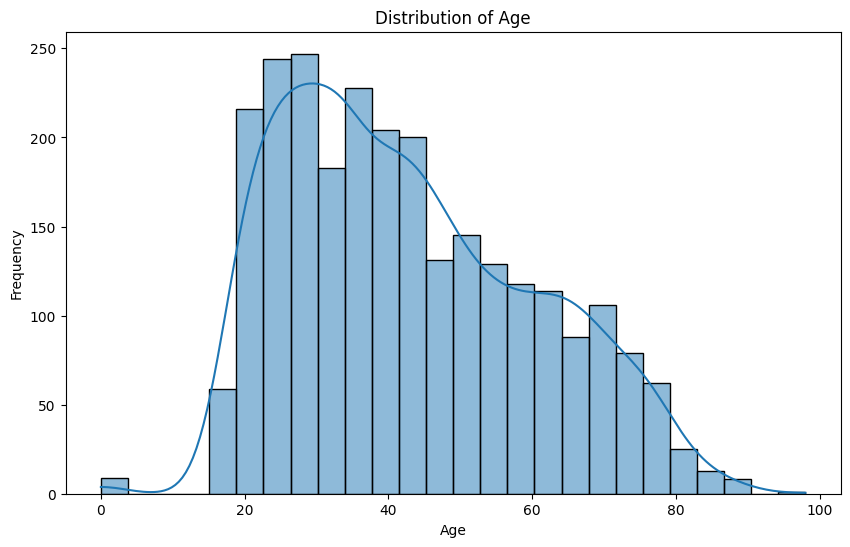

In [580]:
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# The distribution of age appears to be slightly right-skewed, indicating a higher concentration of younger individuals in the dataset.
# Most of the values lies in the range 20-40 age group

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Duration of Residency', ylabel='Count'>

Text(0.5, 1.0, 'Duration of Residency')

Text(0.5, 0, 'Duration of Residency')

Text(0, 0.5, 'Frequency')

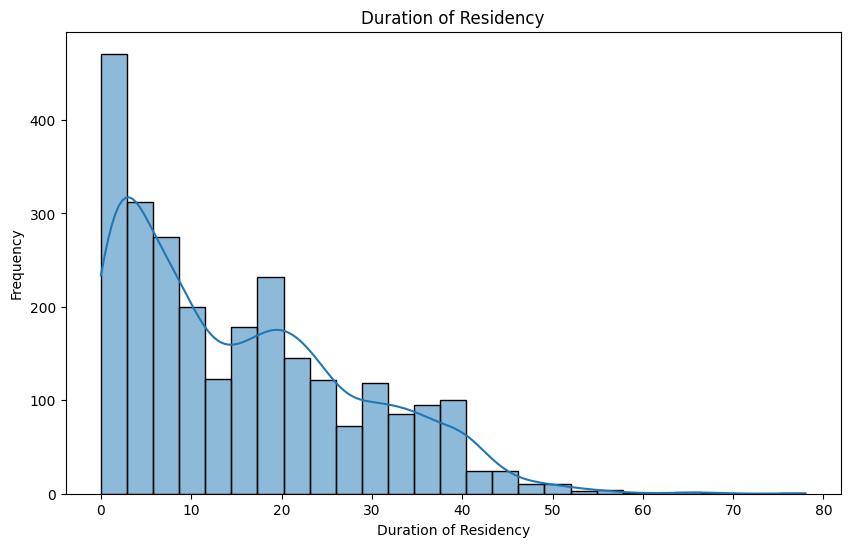

In [581]:
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Duration of Residency'], kde=True)
plt.title('Duration of Residency')
plt.xlabel('Duration of Residency')
plt.ylabel('Frequency')
plt.show()
# Most of the values lies in the range 0-10 duration

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Education Completed', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Education Completed')

Text(0.5, 0, 'Education Completed')

Text(0, 0.5, 'Count')

Text(-0.05, 2.0, '0.1%')

Text(0.95, 1.0, '0.0%')

Text(1.95, 1.0, '0.0%')

Text(2.95, 2.0, '0.1%')

Text(3.95, 6.0, '0.2%')

Text(4.95, 24.0, '0.9%')

Text(5.95, 12.0, '0.5%')

Text(6.95, 15.0, '0.6%')

Text(7.95, 28.0, '1.1%')

Text(8.95, 29.0, '1.1%')

Text(9.95, 22.0, '0.8%')

Text(10.95, 337.0, '12.9%')

Text(11.95, 126.0, '4.8%')

Text(12.95, 177.0, '6.8%')

Text(13.95, 114.0, '4.4%')

Text(14.95, 756.0, '29.0%')

Text(15.95, 920.0, '35.3%')

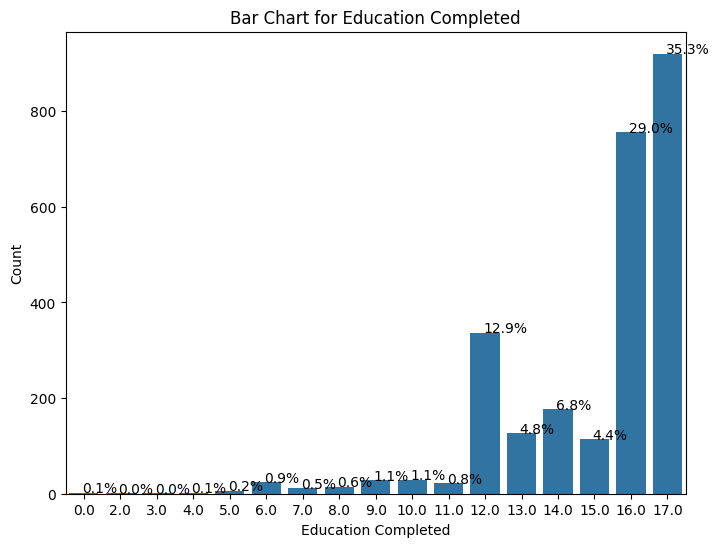

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Household Size', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Household Size')

Text(0.5, 0, 'Household Size')

Text(0, 0.5, 'Count')

Text(-0.05, 210.0, '8.0%')

Text(0.95, 707.0, '27.1%')

Text(1.95, 551.0, '21.1%')

Text(2.95, 662.0, '25.4%')

Text(3.95, 255.0, '9.8%')

Text(4.95, 137.0, '5.3%')

Text(5.95, 41.0, '1.6%')

Text(6.95, 29.0, '1.1%')

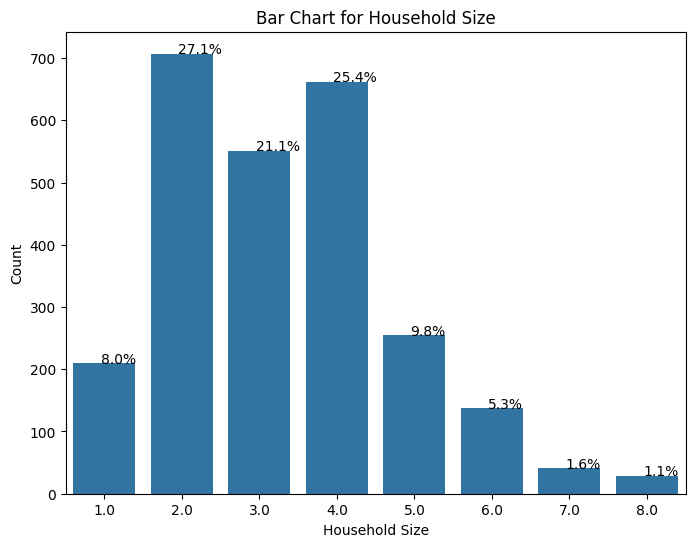

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='No One', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for No One')

Text(0.5, 0, 'No One')

Text(0, 0.5, 'Count')

Text(-0.05, 2392.0, '91.7%')

Text(0.95, 212.0, '8.1%')

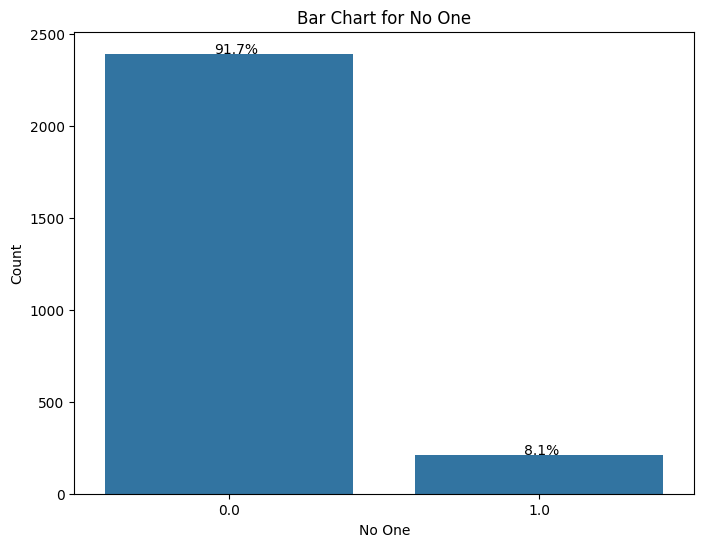

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Spouse', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Spouse')

Text(0.5, 0, 'Spouse')

Text(0, 0.5, 'Count')

Text(-0.05, 1037.0, '39.7%')

Text(0.95, 1567.0, '60.1%')

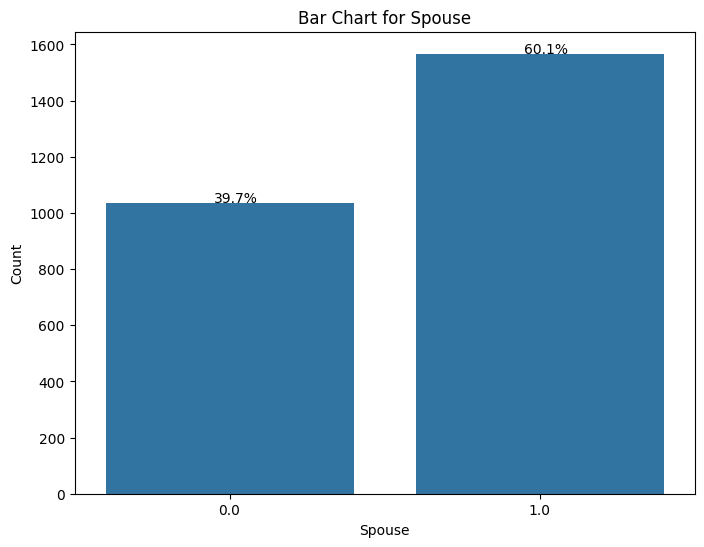

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Children', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Children')

Text(0.5, 0, 'Children')

Text(0, 0.5, 'Count')

Text(-0.05, 1383.0, '53.0%')

Text(0.95, 1221.0, '46.8%')

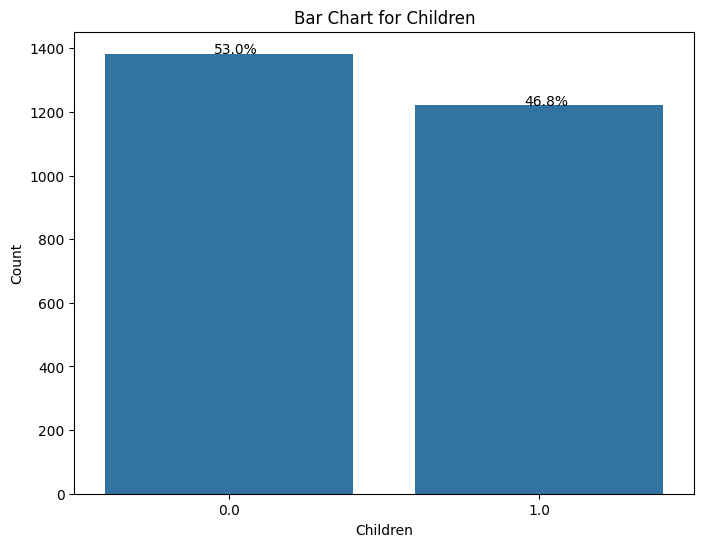

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Grand Children', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Grand Children')

Text(0.5, 0, 'Grand Children')

Text(0, 0.5, 'Count')

Text(-0.05, 2472.0, '94.7%')

Text(0.95, 132.0, '5.1%')

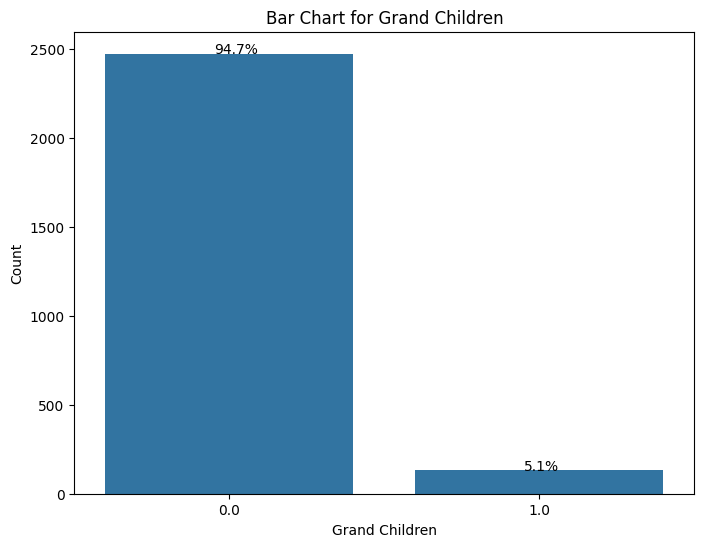

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Parent', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Parent')

Text(0.5, 0, 'Parent')

Text(0, 0.5, 'Count')

Text(-0.05, 2269.0, '87.0%')

Text(0.95, 335.0, '12.8%')

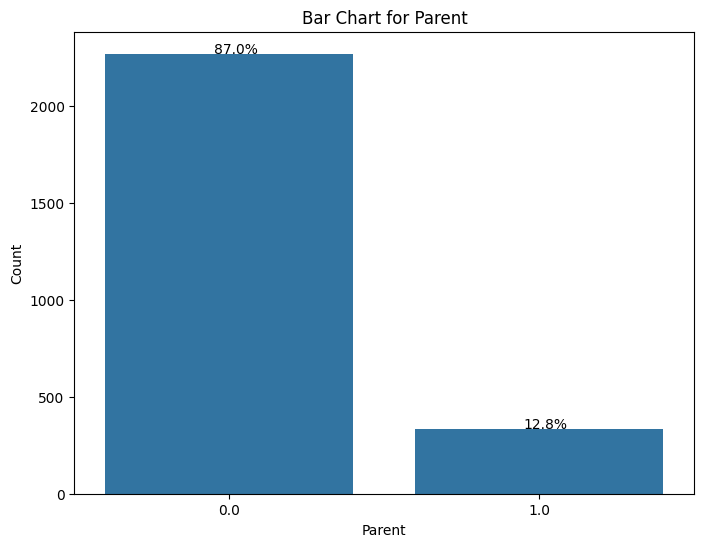

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Grandparent', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Grandparent')

Text(0.5, 0, 'Grandparent')

Text(0, 0.5, 'Count')

Text(-0.05, 2571.0, '98.5%')

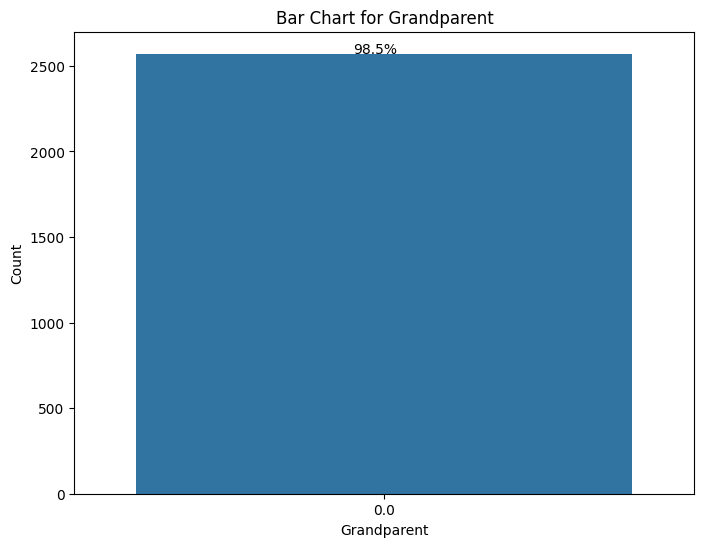

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Brother/Sister', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Brother/Sister')

Text(0.5, 0, 'Brother/Sister')

Text(0, 0.5, 'Count')

Text(-0.05, 2427.0, '93.0%')

Text(0.95, 177.0, '6.8%')

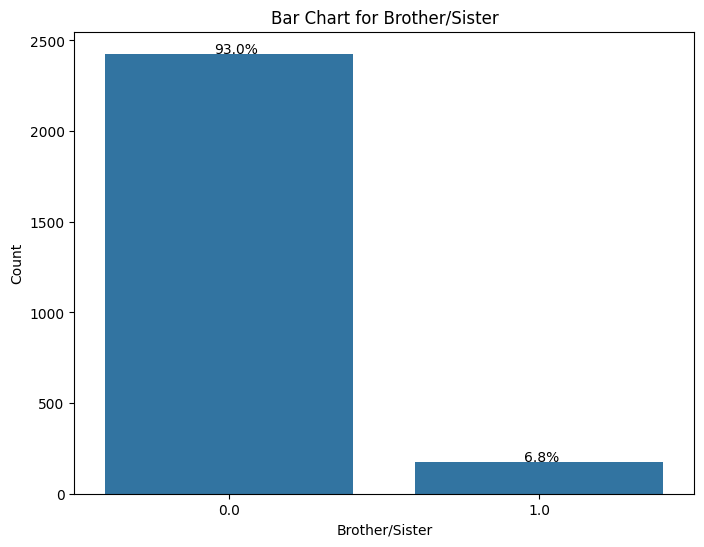

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Other Relative', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Other Relative')

Text(0.5, 0, 'Other Relative')

Text(0, 0.5, 'Count')

Text(-0.05, 2552.0, '97.8%')

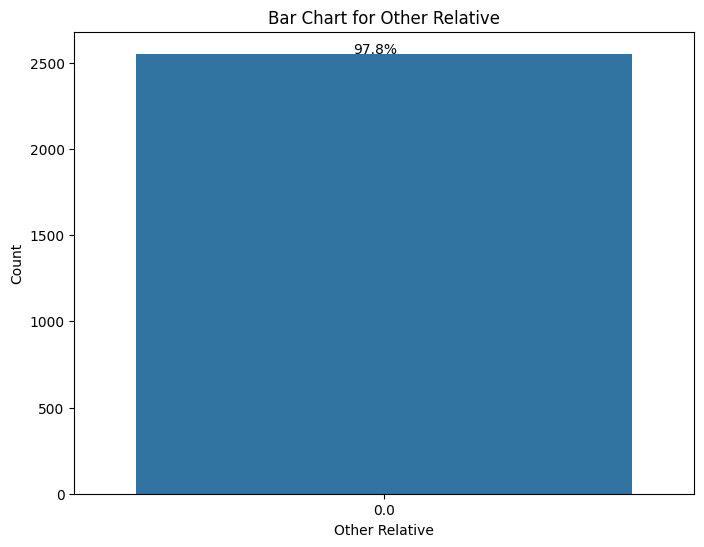

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Friends', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Friends')

Text(0.5, 0, 'Friends')

Text(0, 0.5, 'Count')

Text(-0.05, 2349.0, '90.0%')

Text(0.95, 255.0, '9.8%')

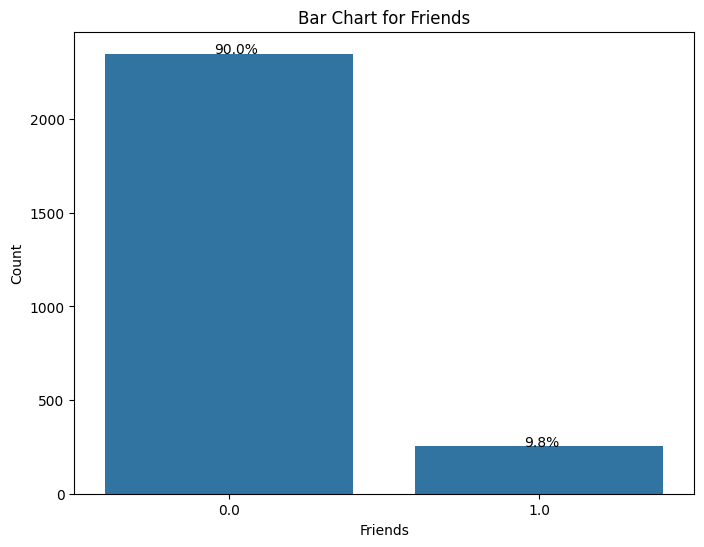

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Full Time Employment', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Full Time Employment')

Text(0.5, 0, 'Full Time Employment')

Text(0, 0.5, 'Count')

Text(-0.05, 1458.0, '55.9%')

Text(0.95, 1144.0, '43.8%')

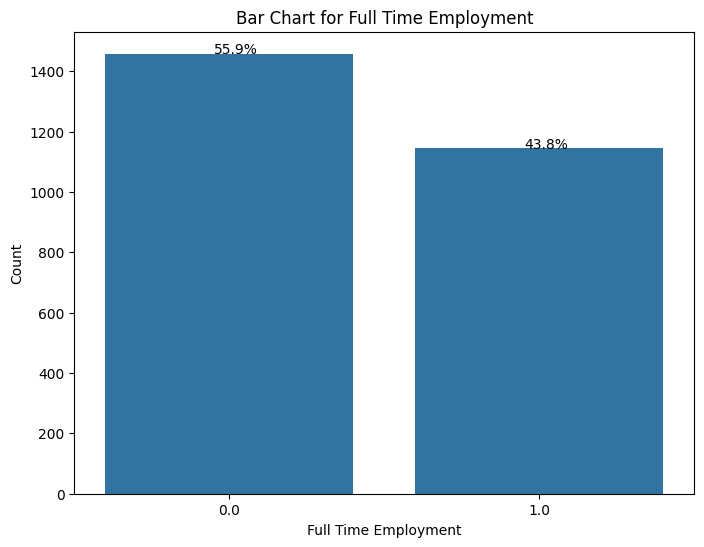

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Part Time Employment', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Part Time Employment')

Text(0.5, 0, 'Part Time Employment')

Text(0, 0.5, 'Count')

Text(-0.05, 2336.0, '89.5%')

Text(0.95, 266.0, '10.2%')

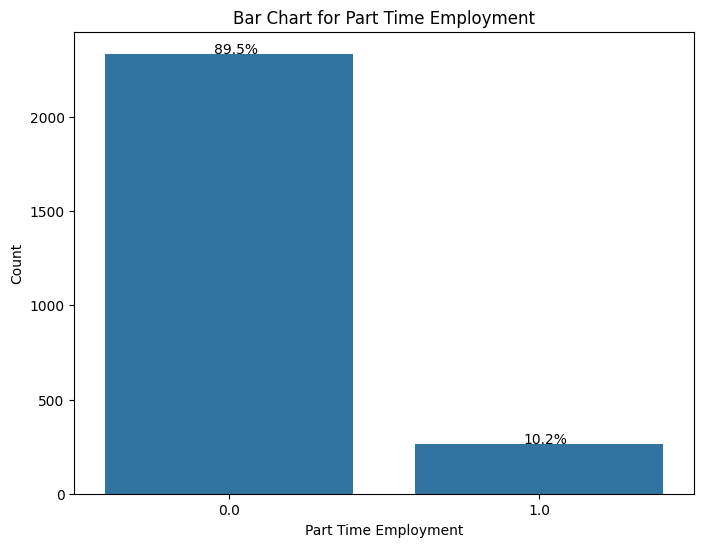

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Student', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Student')

Text(0.5, 0, 'Student')

Text(0, 0.5, 'Count')

Text(-0.05, 2201.0, '84.4%')

Text(0.95, 400.0, '15.3%')

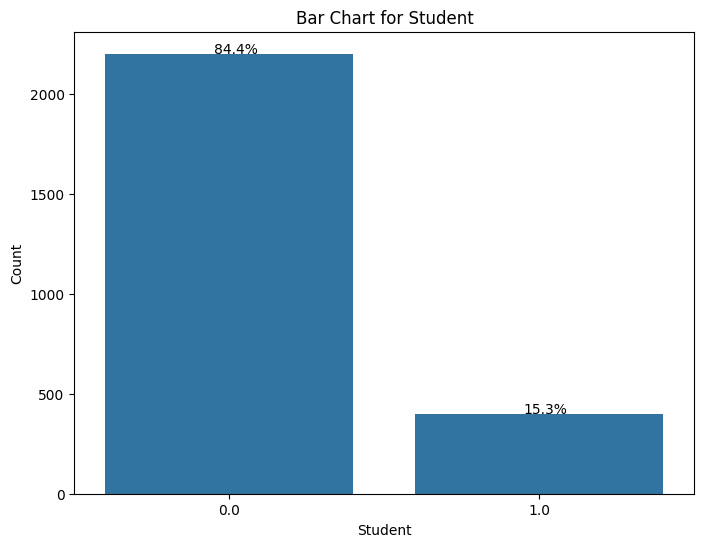

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Homemaker', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Homemaker')

Text(0.5, 0, 'Homemaker')

Text(0, 0.5, 'Count')

Text(-0.05, 2343.0, '89.8%')

Text(0.95, 259.0, '9.9%')

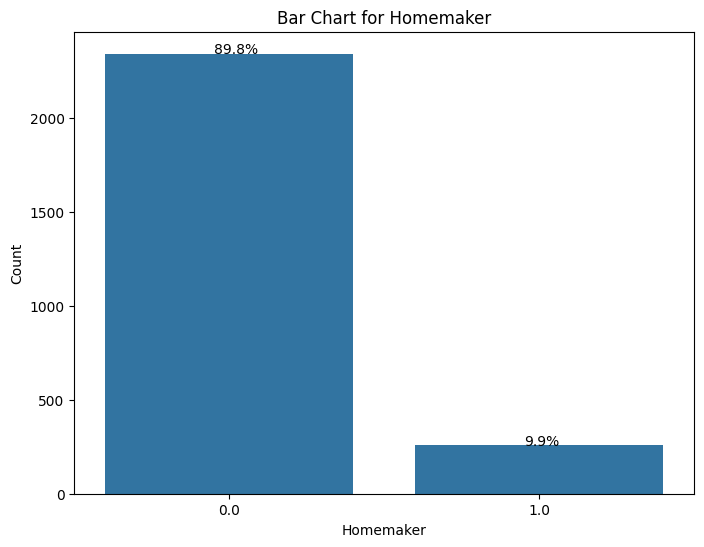

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Retired', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Retired')

Text(0.5, 0, 'Retired')

Text(0, 0.5, 'Count')

Text(-0.05, 2272.0, '87.1%')

Text(0.95, 330.0, '12.6%')

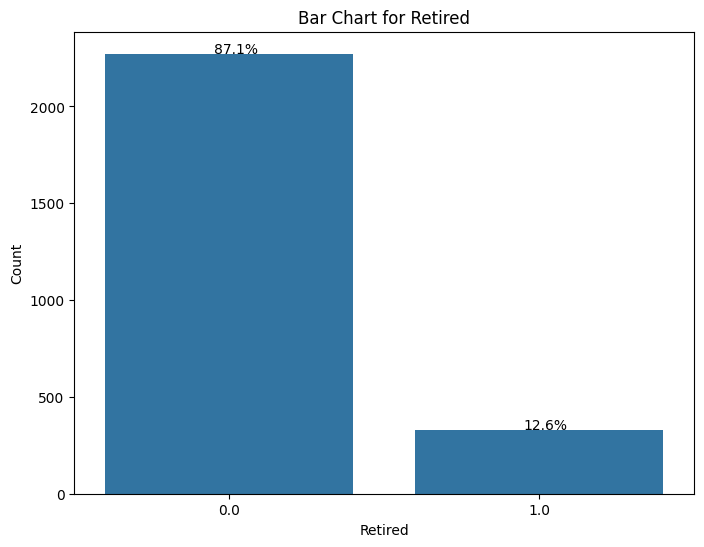

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Achieving Ends Meet', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Achieving Ends Meet')

Text(0.5, 0, 'Achieving Ends Meet')

Text(0, 0.5, 'Count')

Text(-0.05, 2028.0, '77.7%')

Text(0.95, 422.0, '16.2%')

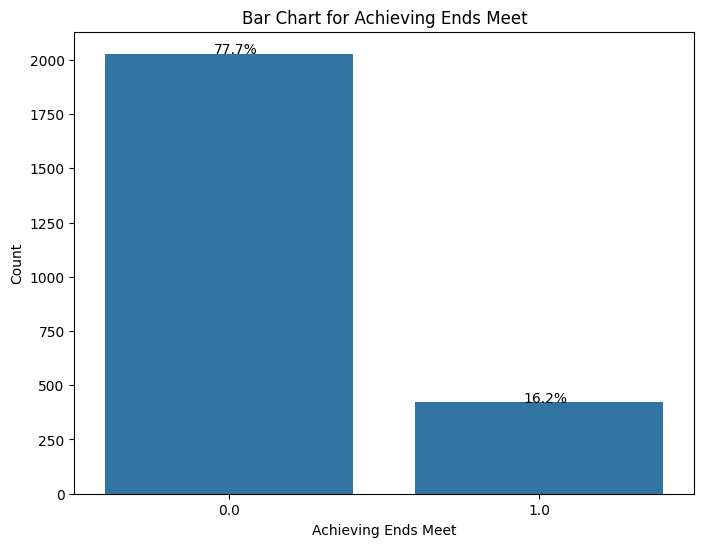

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='US Born', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for US Born')

Text(0.5, 0, 'US Born')

Text(0, 0.5, 'Count')

Text(-0.05, 2353.0, '90.2%')

Text(0.95, 239.0, '9.2%')

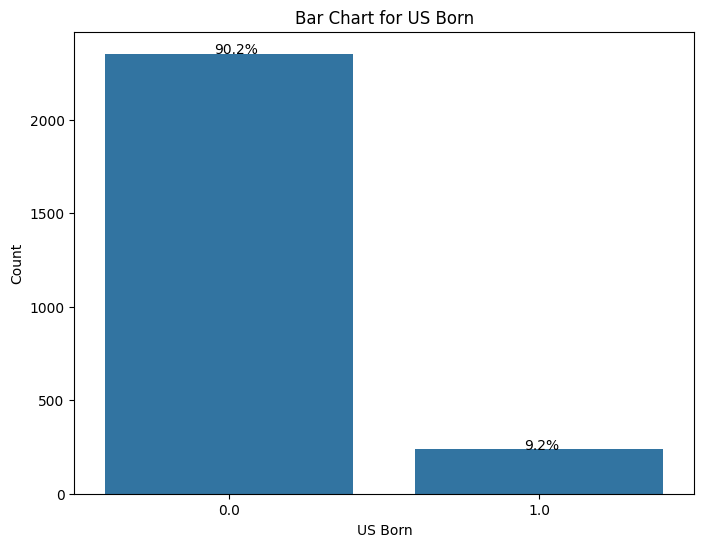

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Primary Language', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Primary Language')

Text(0.5, 0, 'Primary Language')

Text(0, 0.5, 'Count')

Text(-0.05, 859.0, '32.9%')

Text(0.95, 1725.0, '66.1%')

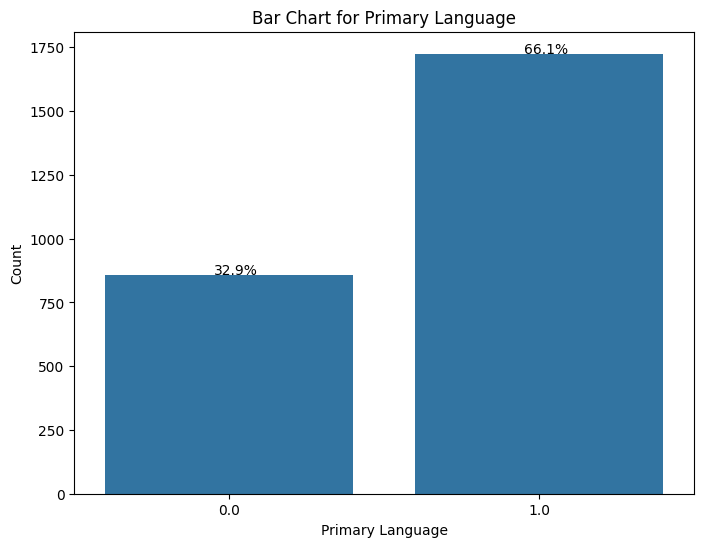

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Hygiene Assistance', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Hygiene Assistance')

Text(0.5, 0, 'Hygiene Assistance')

Text(0, 0.5, 'Count')

Text(-0.05, 2517.0, '96.5%')

Text(0.95, 70.0, '2.7%')

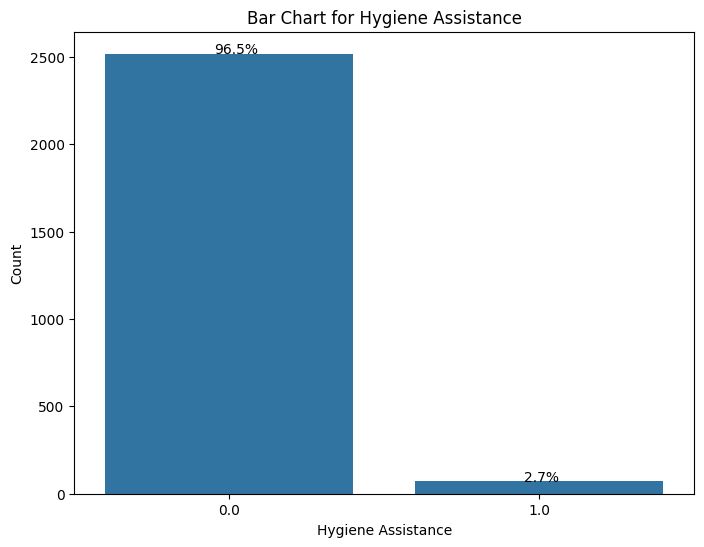

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Smoking', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Smoking')

Text(0.5, 0, 'Smoking')

Text(0, 0.5, 'Count')

Text(-0.05, 2431.0, '93.2%')

Text(0.95, 159.0, '6.1%')

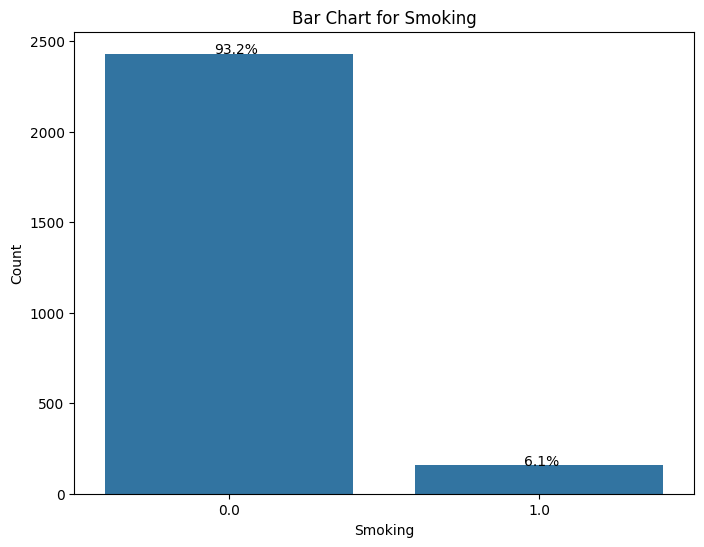

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Drinking', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Drinking')

Text(0.5, 0, 'Drinking')

Text(0, 0.5, 'Count')

Text(-0.05, 2504.0, '96.0%')

Text(0.95, 86.0, '3.3%')

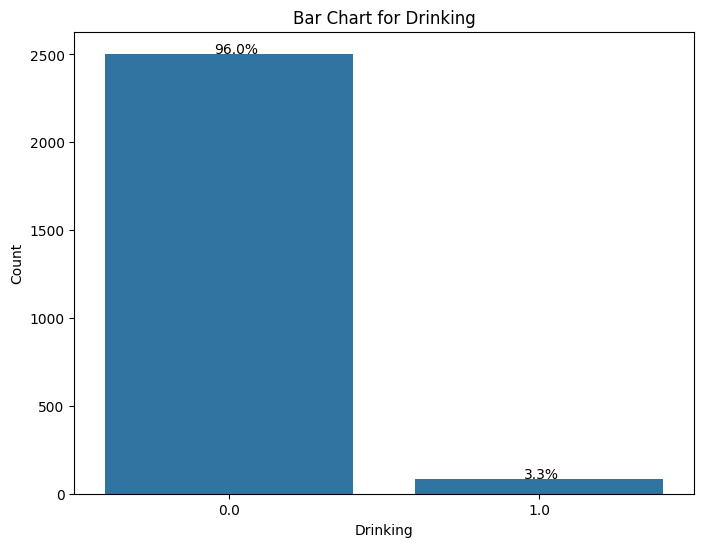

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Regular Exercise', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Regular Exercise')

Text(0.5, 0, 'Regular Exercise')

Text(0, 0.5, 'Count')

Text(-0.05, 992.0, '38.0%')

Text(0.95, 1604.0, '61.5%')

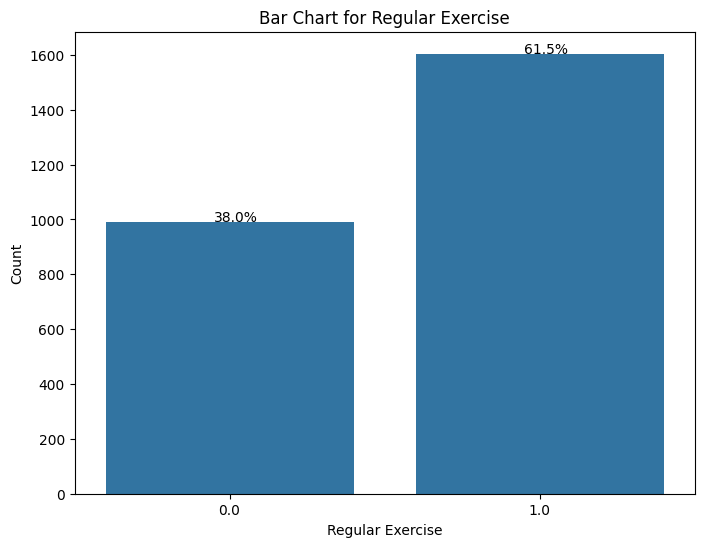

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Healthy Diet', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Healthy Diet')

Text(0.5, 0, 'Healthy Diet')

Text(0, 0.5, 'Count')

Text(-0.05, 496.0, '19.0%')

Text(0.95, 2096.0, '80.3%')

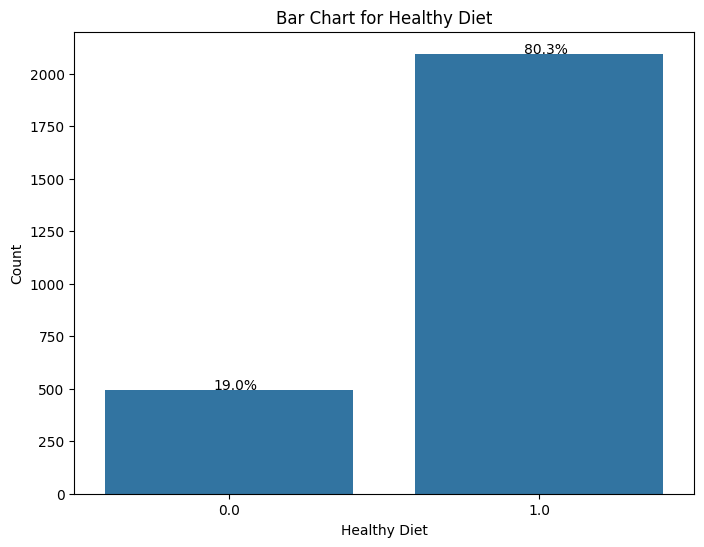

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Close Friend', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Close Friend')

Text(0.5, 0, 'Close Friend')

Text(0, 0.5, 'Count')

Text(-0.05, 1623.0, '62.2%')

Text(0.95, 967.0, '37.1%')

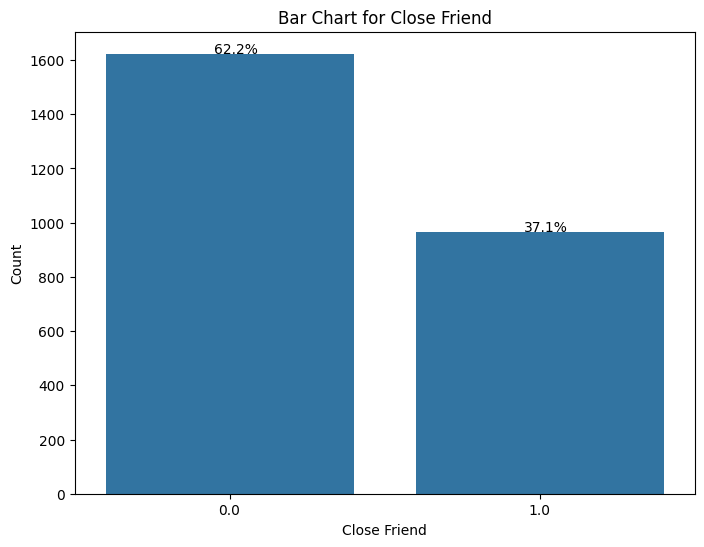

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Acquaintances', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Acquaintances')

Text(0.5, 0, 'Acquaintances')

Text(0, 0.5, 'Count')

Text(-0.05, 2141.0, '82.1%')

Text(0.95, 448.0, '17.2%')

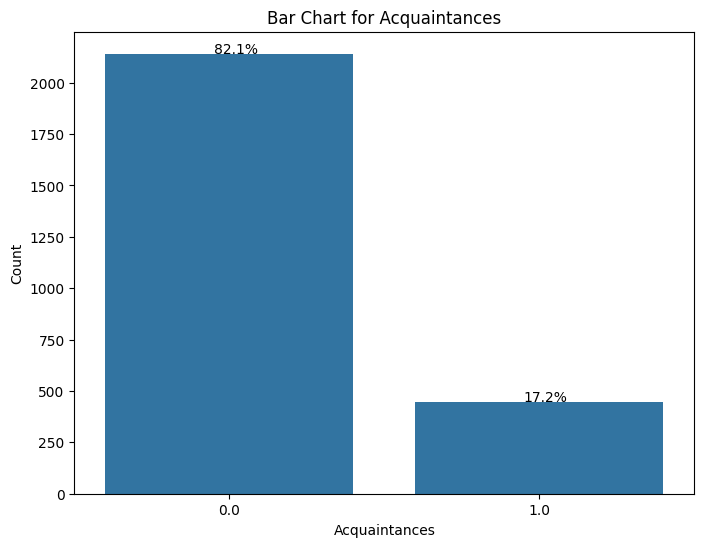

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Heal Professionals', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Heal Professionals')

Text(0.5, 0, 'Heal Professionals')

Text(0, 0.5, 'Count')

Text(-0.05, 1326.0, '50.8%')

Text(0.95, 1264.0, '48.4%')

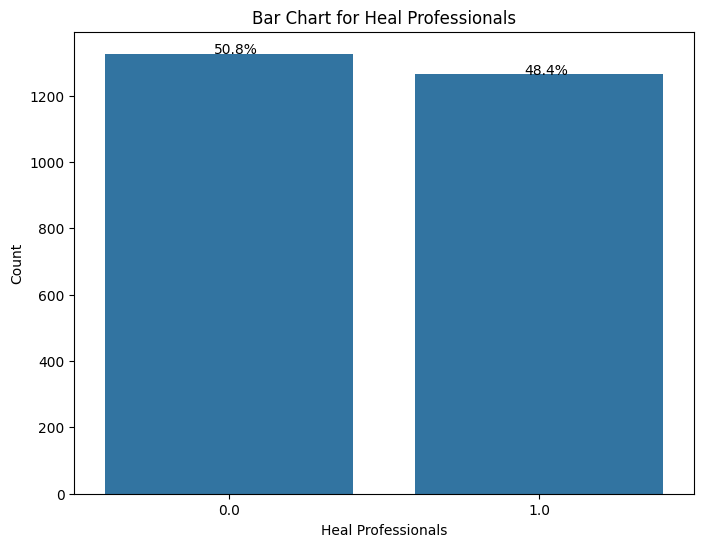

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Mobile Apps', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Mobile Apps')

Text(0.5, 0, 'Mobile Apps')

Text(0, 0.5, 'Count')

Text(-0.05, 2345.0, '89.9%')

Text(0.95, 245.0, '9.4%')

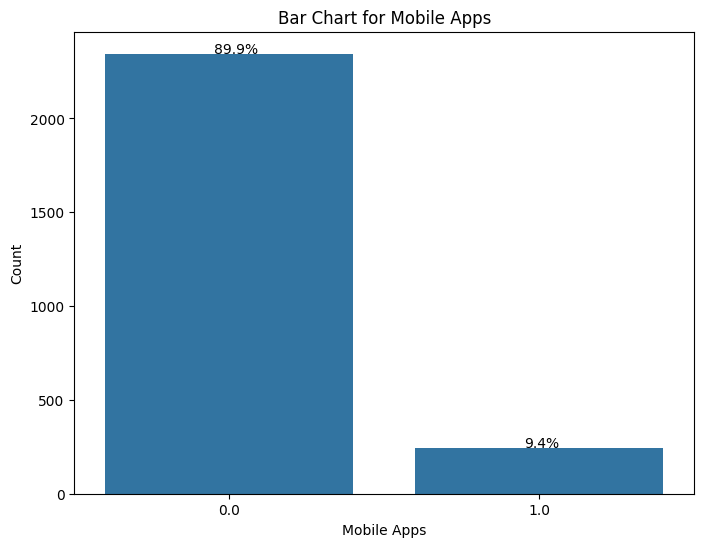

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Email', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Email')

Text(0.5, 0, 'Email')

Text(0, 0.5, 'Count')

Text(-0.05, 2278.0, '87.3%')

Text(0.95, 312.0, '12.0%')

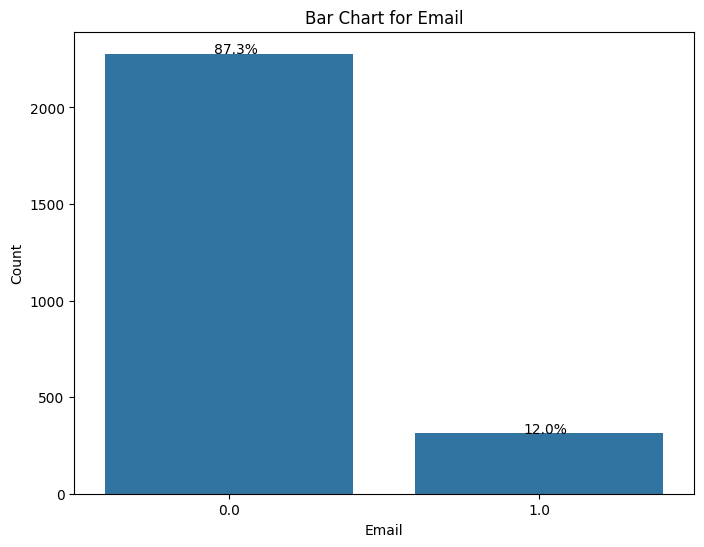

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Social Networks', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Social Networks')

Text(0.5, 0, 'Social Networks')

Text(0, 0.5, 'Count')

Text(-0.05, 2139.0, '82.0%')

Text(0.95, 451.0, '17.3%')

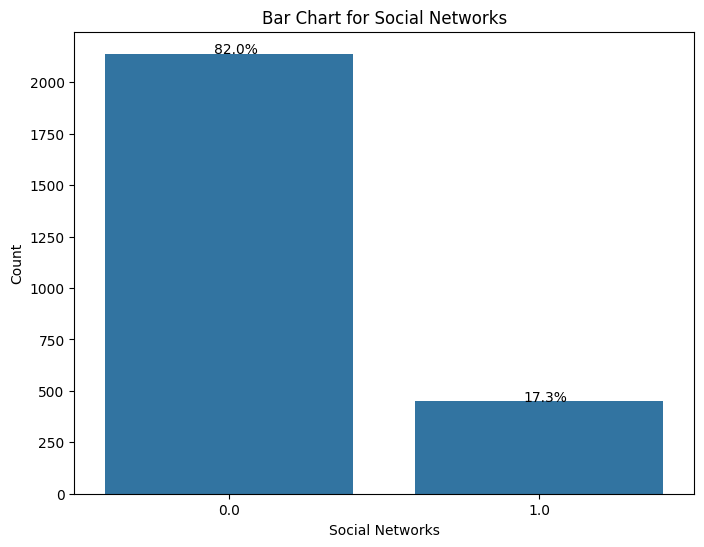

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Online Communities', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Online Communities')

Text(0.5, 0, 'Online Communities')

Text(0, 0.5, 'Count')

Text(-0.05, 2180.0, '83.6%')

Text(0.95, 410.0, '15.7%')

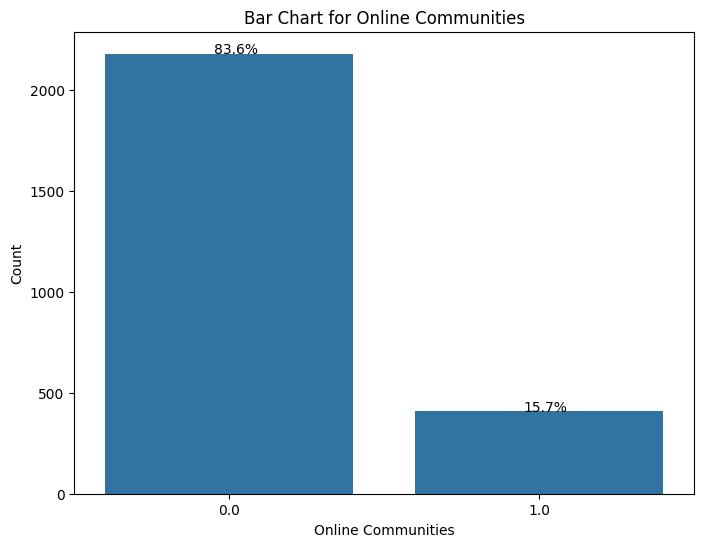

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Health Website', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Health Website')

Text(0.5, 0, 'Health Website')

Text(0, 0.5, 'Count')

Text(-0.05, 1490.0, '57.1%')

Text(0.95, 1100.0, '42.2%')

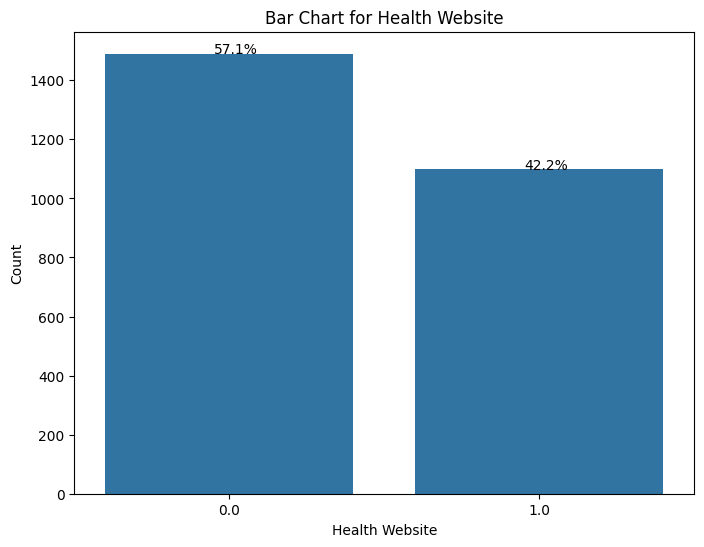

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Quality of Life', ylabel='count'>

Text(0.5, 1.0, 'Bar Chart for Quality of Life')

Text(0.5, 0, 'Quality of Life')

Text(0, 0.5, 'Count')

Text(-0.05, 2.0, '0.1%')

Text(0.95, 4.0, '0.2%')

Text(1.95, 11.0, '0.4%')

Text(2.95, 23.0, '0.9%')

Text(3.95, 48.0, '1.8%')

Text(4.95, 211.0, '8.1%')

Text(5.95, 218.0, '8.4%')

Text(6.95, 486.0, '18.6%')

Text(7.95, 783.0, '30.0%')

Text(8.95, 435.0, '16.7%')

Text(9.95, 344.0, '13.2%')

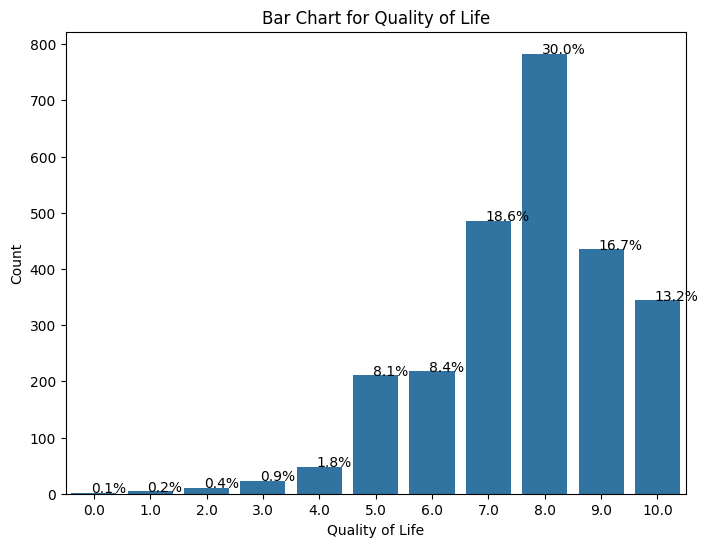

In [582]:
for col in df_analysis.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_analysis)
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add percentage labels to each bar
    total = len(df_analysis)
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.gca().annotate(percentage, (x, y), fontsize=10)

    plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

Text(-0.05, 1425, '54.6%')

Text(0.95, 1157, '44.3%')

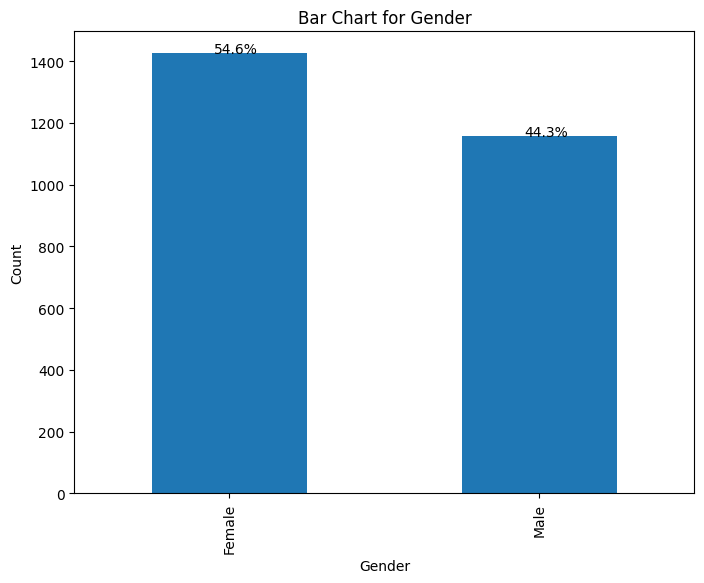

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Ethnicity')

Text(0.5, 0, 'Ethnicity')

Text(0, 0.5, 'Count')

Text(-0.05, 639, '24.5%')

Text(0.95, 574, '22.0%')

Text(1.95, 514, '19.7%')

Text(2.95, 471, '18.1%')

Text(3.95, 265, '10.2%')

Text(4.95, 144, '5.5%')

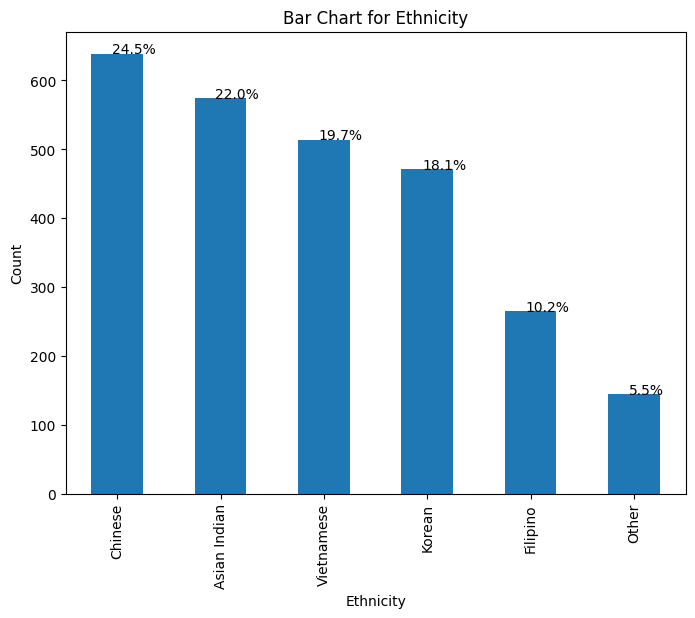

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Marital Status')

Text(0.5, 0, 'Marital Status')

Text(0, 0.5, 'Count')

Text(-0.05, 1725, '66.1%')

Text(0.95, 726, '27.8%')

Text(1.95, 110, '4.2%')

Text(2.95, 30, '1.1%')

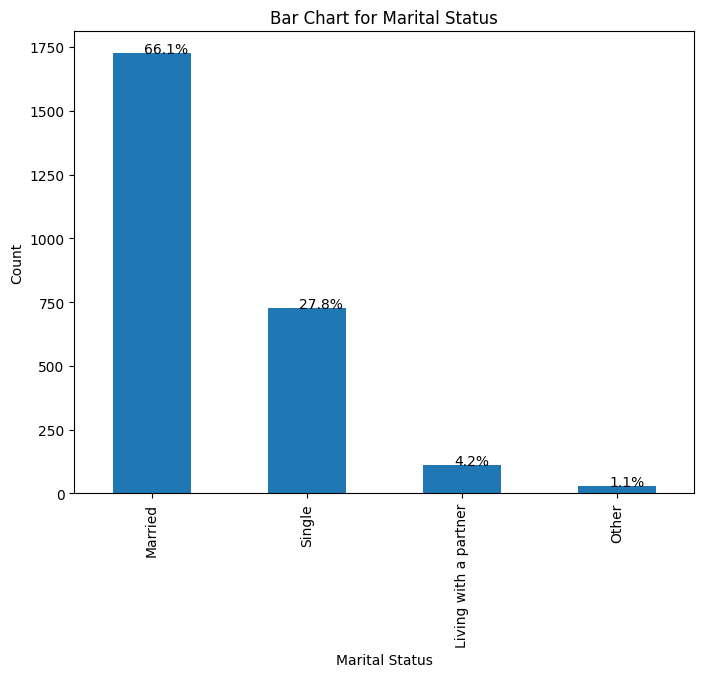

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Religion')

Text(0.5, 0, 'Religion')

Text(0, 0.5, 'Count')

Text(-0.05, 645, '24.7%')

Text(0.95, 492, '18.9%')

Text(1.95, 479, '18.4%')

Text(2.95, 350, '13.4%')

Text(3.95, 68, '2.6%')

Text(4.95, 47, '1.8%')

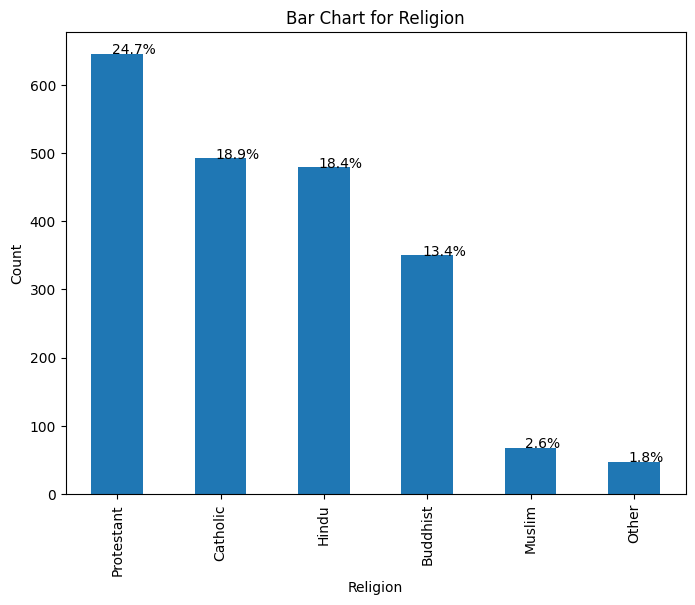

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Occupation')

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Count')

Text(-0.05, 698, '26.8%')

Text(0.95, 304, '11.7%')

Text(1.95, 191, '7.3%')

Text(2.95, 190, '7.3%')

Text(3.95, 143, '5.5%')

Text(4.95, 127, '4.9%')

Text(5.95, 83, '3.2%')

Text(6.95, 77, '3.0%')

Text(7.95, 1, '0.0%')

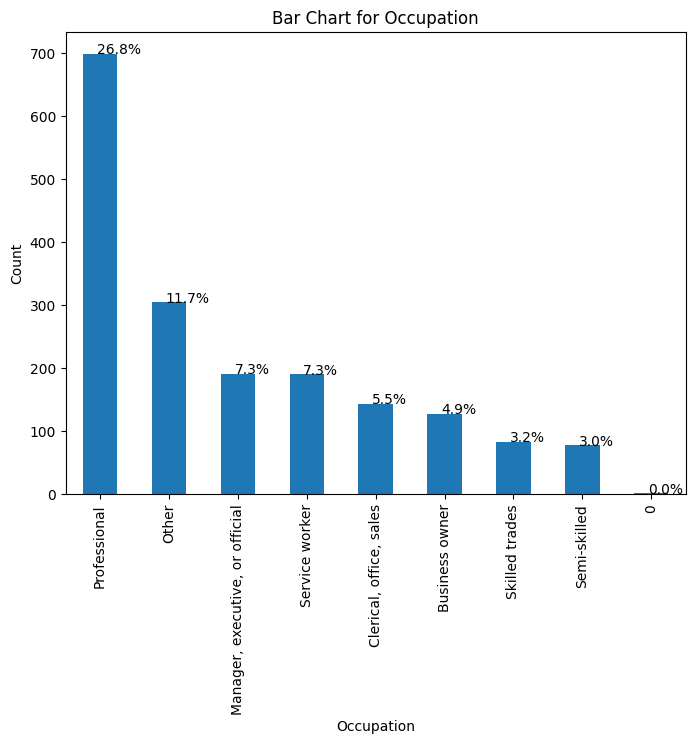

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Income')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Count')

Text(-0.05, 993, '38.1%')

Text(0.95, 254, '9.7%')

Text(1.95, 207, '7.9%')

Text(2.95, 205, '7.9%')

Text(3.95, 198, '7.6%')

Text(4.95, 190, '7.3%')

Text(5.95, 181, '6.9%')

Text(6.95, 178, '6.8%')

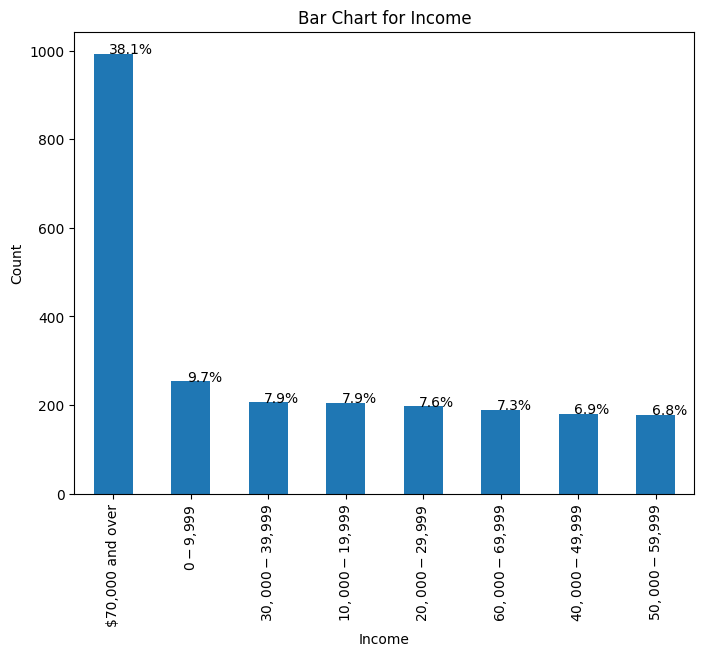

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for English Speaking')

Text(0.5, 0, 'English Speaking')

Text(0, 0.5, 'Count')

Text(-0.05, 974, '37.3%')

Text(0.95, 808, '31.0%')

Text(1.95, 632, '24.2%')

Text(2.95, 177, '6.8%')

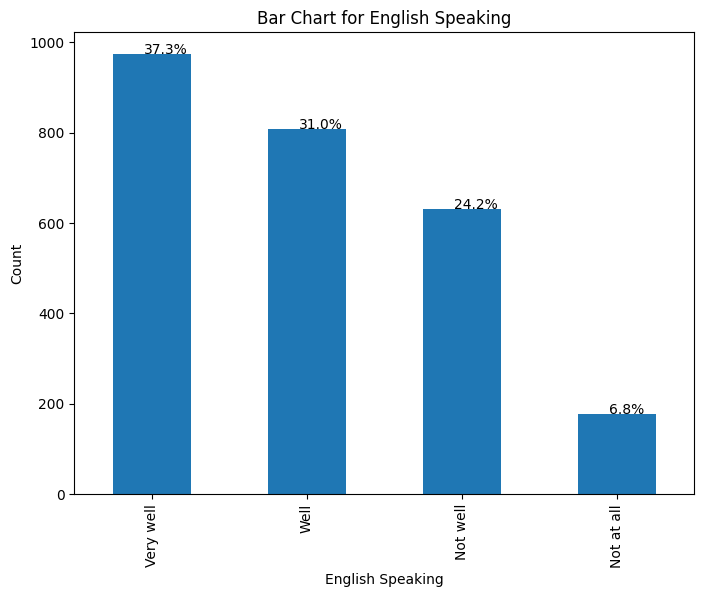

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for English Difficulties')

Text(0.5, 0, 'English Difficulties')

Text(0, 0.5, 'Count')

Text(-0.05, 772, '29.6%')

Text(0.95, 733, '28.1%')

Text(1.95, 549, '21.0%')

Text(2.95, 516, '19.8%')

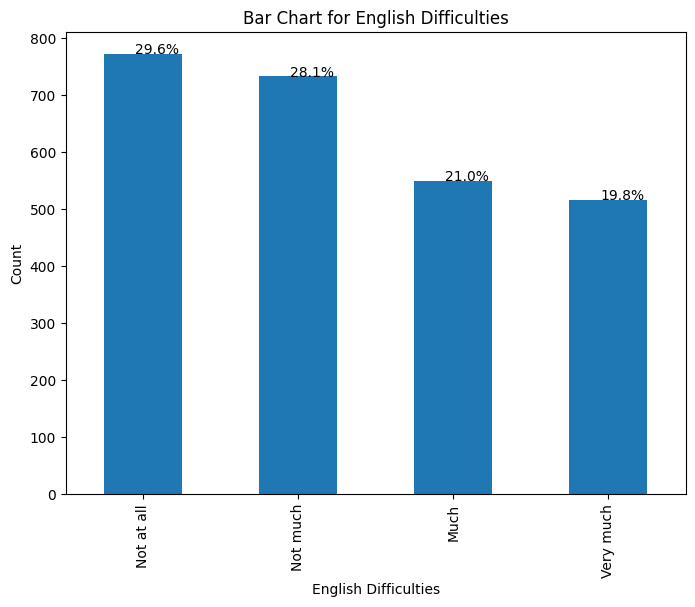

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Familiarity with America')

Text(0.5, 0, 'Familiarity with America')

Text(0, 0.5, 'Count')

Text(-0.05, 1238, '47.5%')

Text(0.95, 721, '27.6%')

Text(1.95, 498, '19.1%')

Text(2.95, 123, '4.7%')

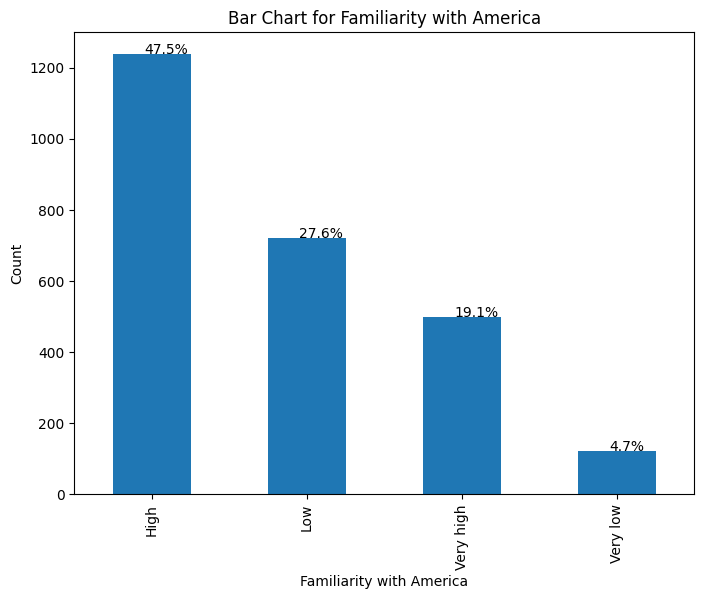

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Familiarity with Ethnic Origin')

Text(0.5, 0, 'Familiarity with Ethnic Origin')

Text(0, 0.5, 'Count')

Text(-0.05, 1369, '52.5%')

Text(0.95, 864, '33.1%')

Text(1.95, 295, '11.3%')

Text(2.95, 51, '2.0%')

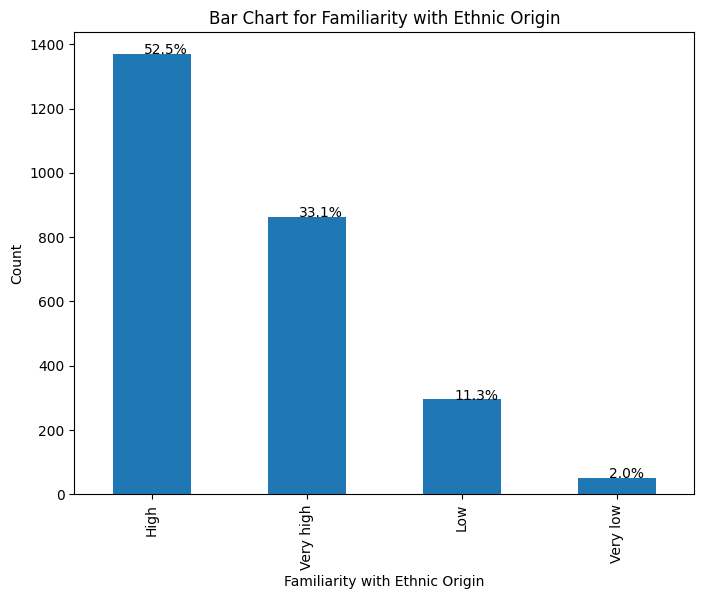

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Identify Ethnically')

Text(0.5, 0, 'Identify Ethnically')

Text(0, 0.5, 'Count')

Text(-0.05, 1211, '46.4%')

Text(0.95, 1039, '39.8%')

Text(1.95, 293, '11.2%')

Text(2.95, 31, '1.2%')

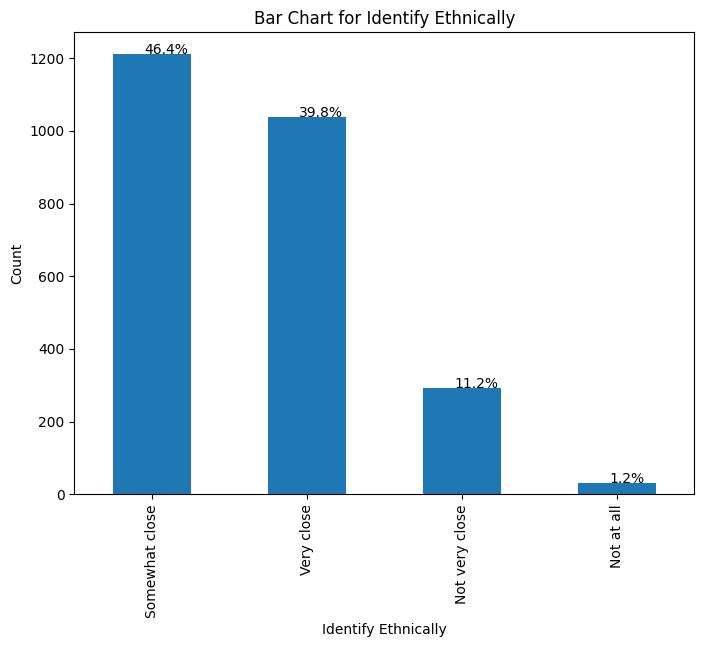

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Belonging')

Text(0.5, 0, 'Belonging')

Text(0, 0.5, 'Count')

Text(-0.05, 1255, '48.1%')

Text(0.95, 766, '29.4%')

Text(1.95, 450, '17.2%')

Text(2.95, 87, '3.3%')

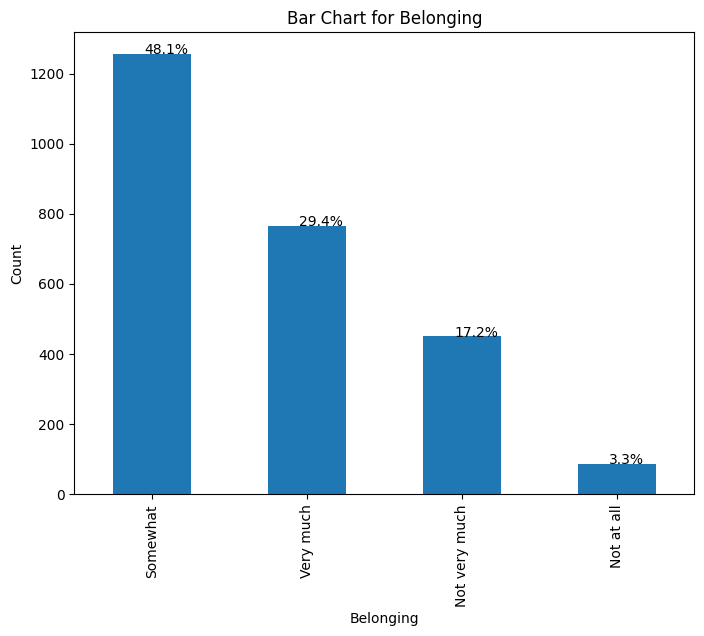

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Present Health')

Text(0.5, 0, 'Present Health')

Text(0, 0.5, 'Count')

Text(-0.05, 997, '38.2%')

Text(0.95, 795, '30.5%')

Text(1.95, 530, '20.3%')

Text(2.95, 237, '9.1%')

Text(3.95, 40, '1.5%')

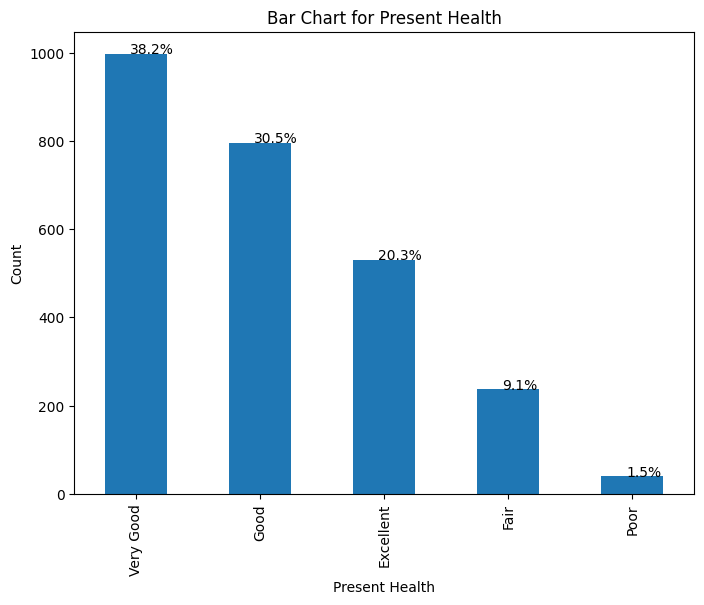

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Present Mental Health')

Text(0.5, 0, 'Present Mental Health')

Text(0, 0.5, 'Count')

Text(-0.05, 1004, '38.5%')

Text(0.95, 733, '28.1%')

Text(1.95, 635, '24.3%')

Text(2.95, 196, '7.5%')

Text(3.95, 28, '1.1%')

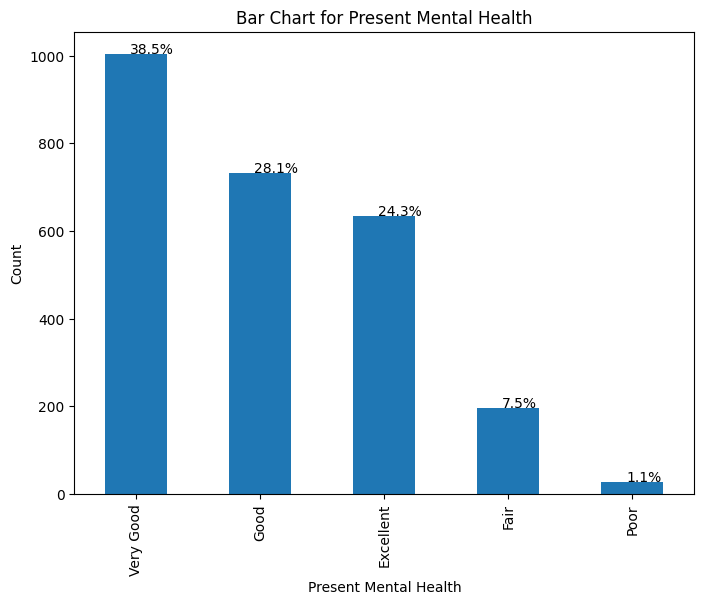

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Present Oral Health')

Text(0.5, 0, 'Present Oral Health')

Text(0, 0.5, 'Count')

Text(-0.05, 893, '34.2%')

Text(0.95, 799, '30.6%')

Text(1.95, 428, '16.4%')

Text(2.95, 364, '14.0%')

Text(3.95, 109, '4.2%')

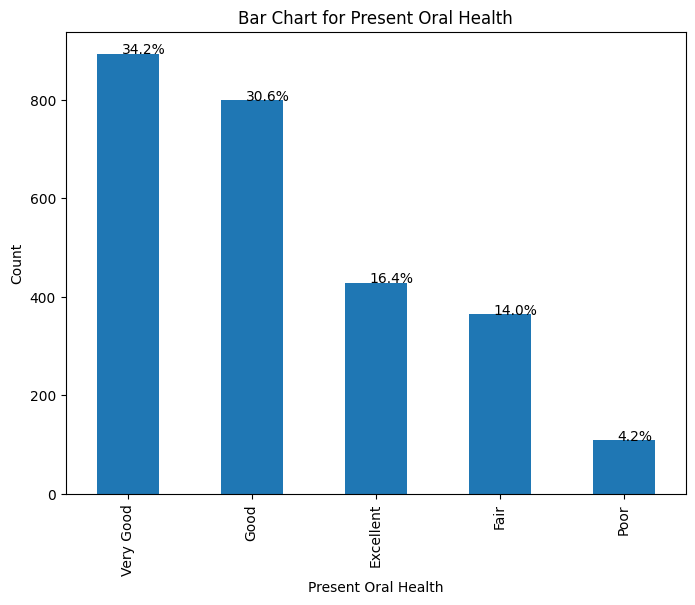

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Hypertension')

Text(0.5, 0, 'Hypertension')

Text(0, 0.5, 'Count')

Text(-0.05, 2191, '84.0%')

Text(0.95, 392, '15.0%')

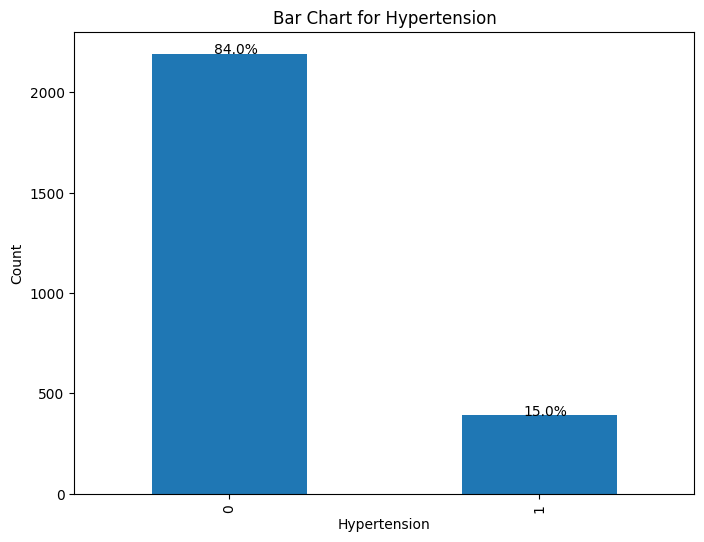

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Diabetes')

Text(0.5, 0, 'Diabetes')

Text(0, 0.5, 'Count')

Text(-0.05, 2367, '90.7%')

Text(0.95, 206, '7.9%')

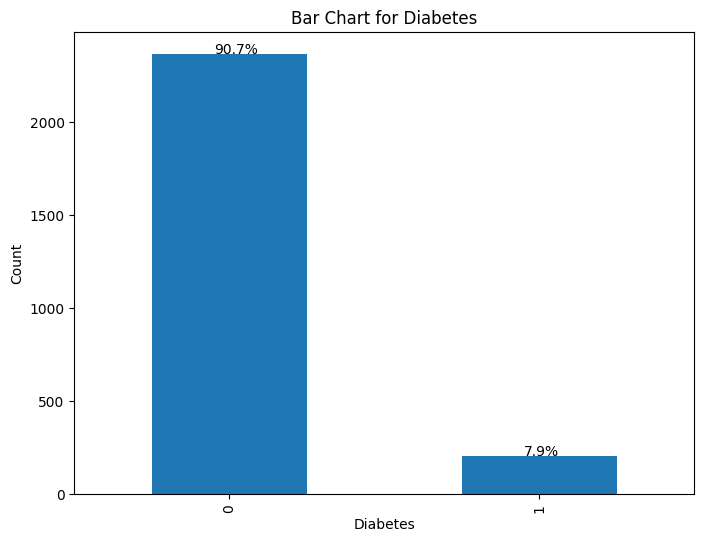

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Arthritis')

Text(0.5, 0, 'Arthritis')

Text(0, 0.5, 'Count')

Text(-0.05, 2379, '91.2%')

Text(0.95, 195, '7.5%')

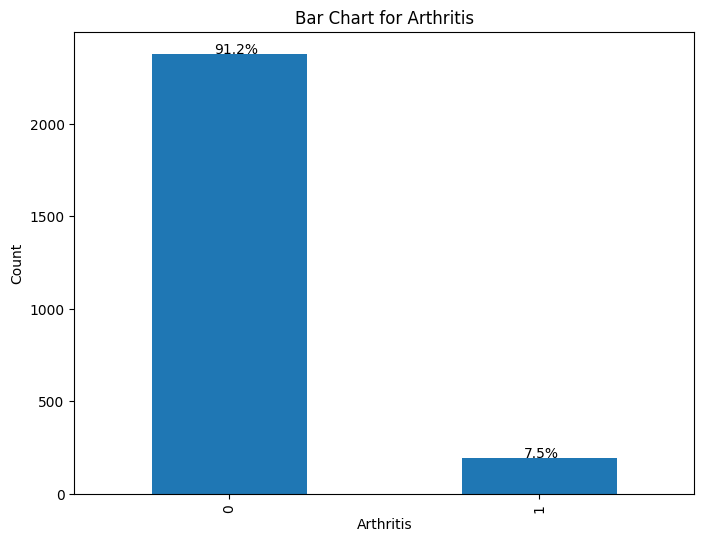

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Physical Check-up')

Text(0.5, 0, 'Physical Check-up')

Text(0, 0.5, 'Count')

Text(-0.05, 1740, '66.7%')

Text(0.95, 833, '31.9%')

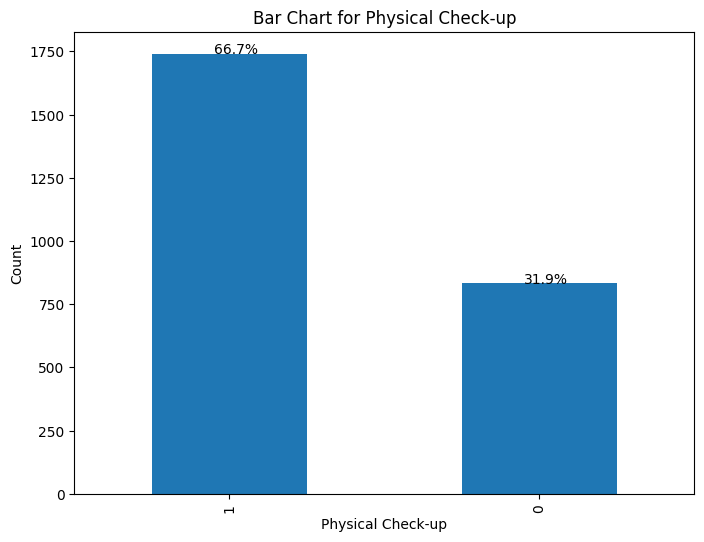

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Dentist Check-up')

Text(0.5, 0, 'Dentist Check-up')

Text(0, 0.5, 'Count')

Text(-0.05, 1462, '56.0%')

Text(0.95, 1100, '42.2%')

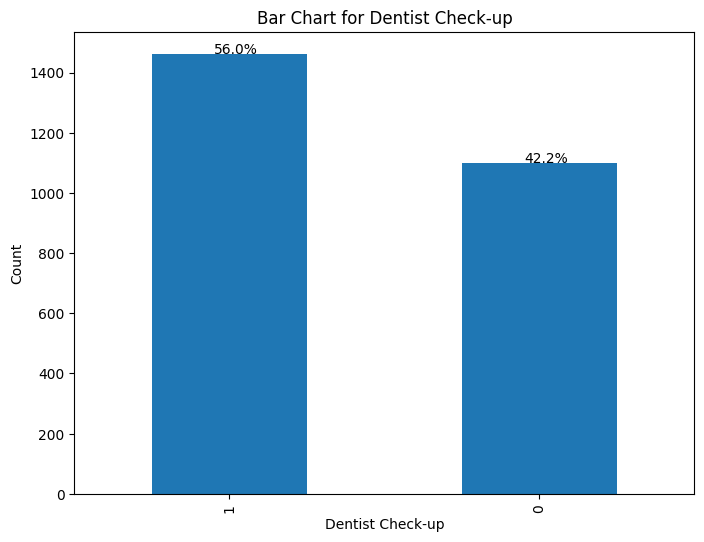

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Urgentcare')

Text(0.5, 0, 'Urgentcare')

Text(0, 0.5, 'Count')

Text(-0.05, 2112, '81.0%')

Text(0.95, 440, '16.9%')

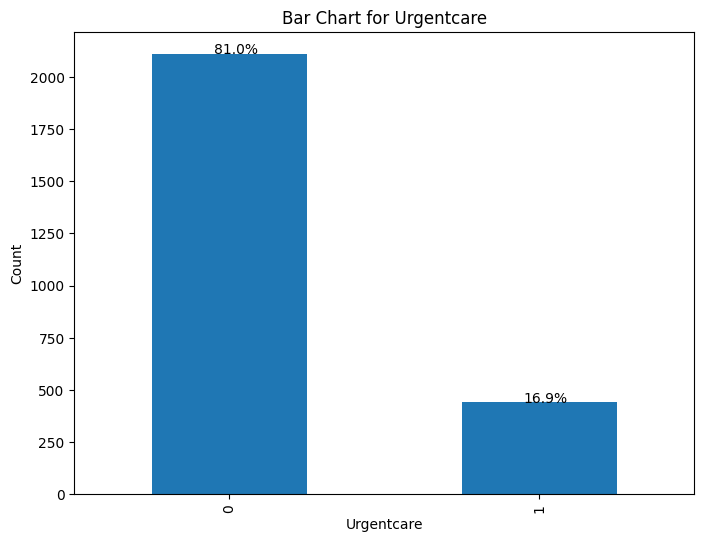

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Folkmedicine')

Text(0.5, 0, 'Folkmedicine')

Text(0, 0.5, 'Count')

Text(-0.05, 2189, '83.9%')

Text(0.95, 348, '13.3%')

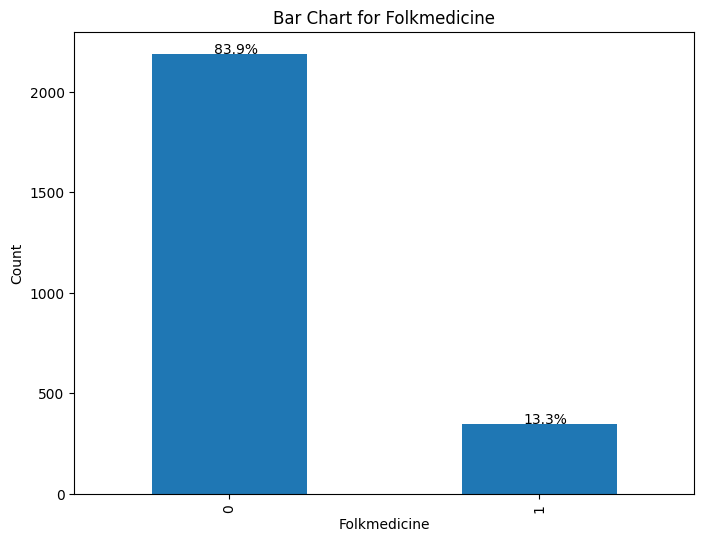

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Primary Care')

Text(0.5, 0, 'Primary Care')

Text(0, 0.5, 'Count')

Text(-0.05, 1593, '61.1%')

Text(0.95, 978, '37.5%')

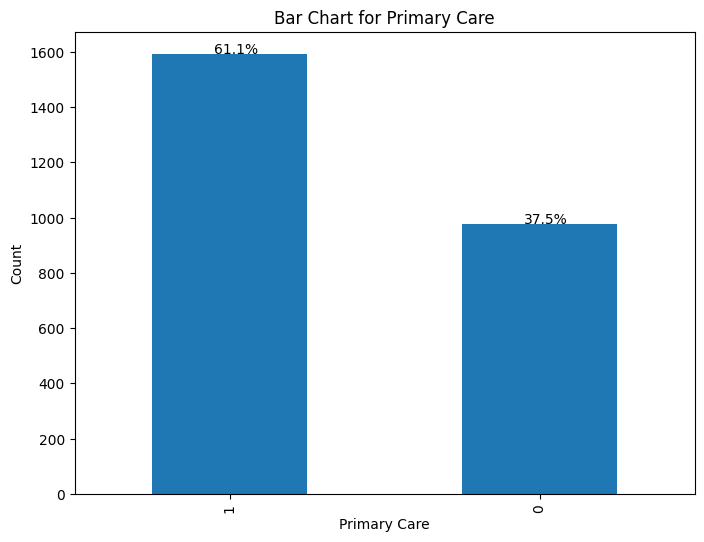

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Health Insurance')

Text(0.5, 0, 'Health Insurance')

Text(0, 0.5, 'Count')

Text(-0.05, 2207, '84.6%')

Text(0.95, 381, '14.6%')

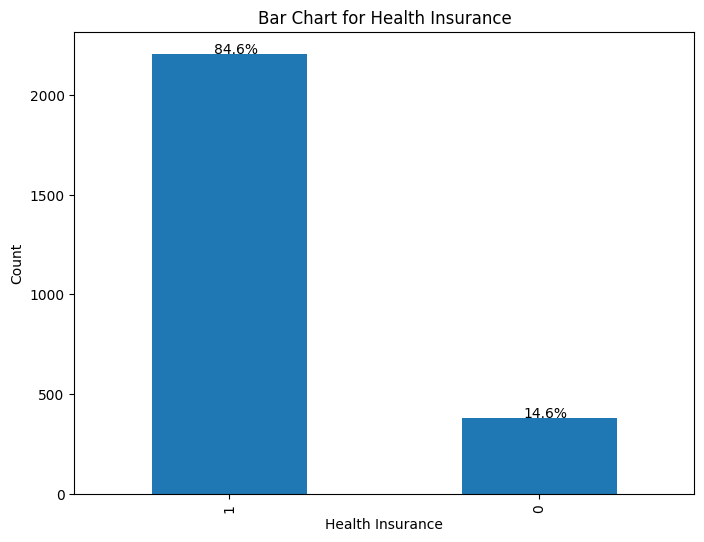

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Dental Insurance')

Text(0.5, 0, 'Dental Insurance')

Text(0, 0.5, 'Count')

Text(-0.05, 1529, '58.6%')

Text(0.95, 1050, '40.2%')

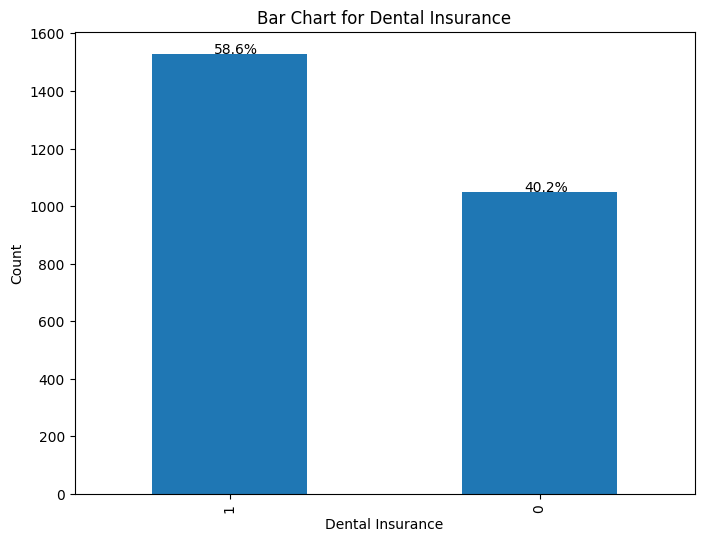

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Unmet Health Need')

Text(0.5, 0, 'Unmet Health Need')

Text(0, 0.5, 'Count')

Text(-0.05, 2288, '87.7%')

Text(0.95, 294, '11.3%')

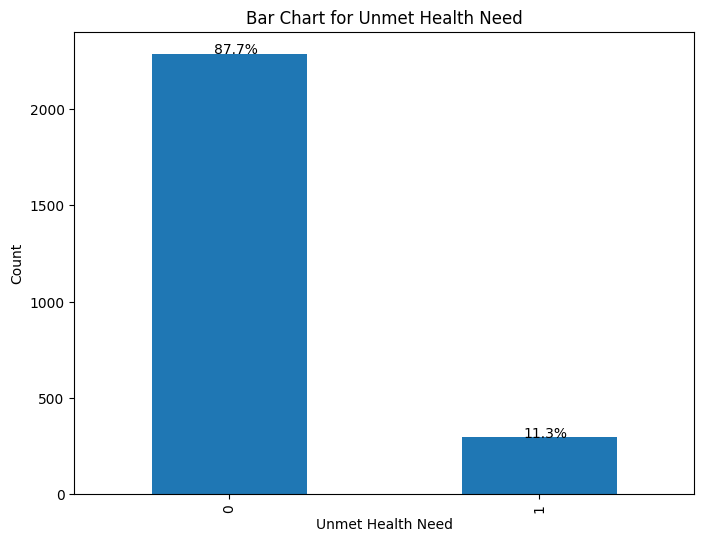

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Unmet Dental Needs')

Text(0.5, 0, 'Unmet Dental Needs')

Text(0, 0.5, 'Count')

Text(-0.05, 2250, '86.2%')

Text(0.95, 319, '12.2%')

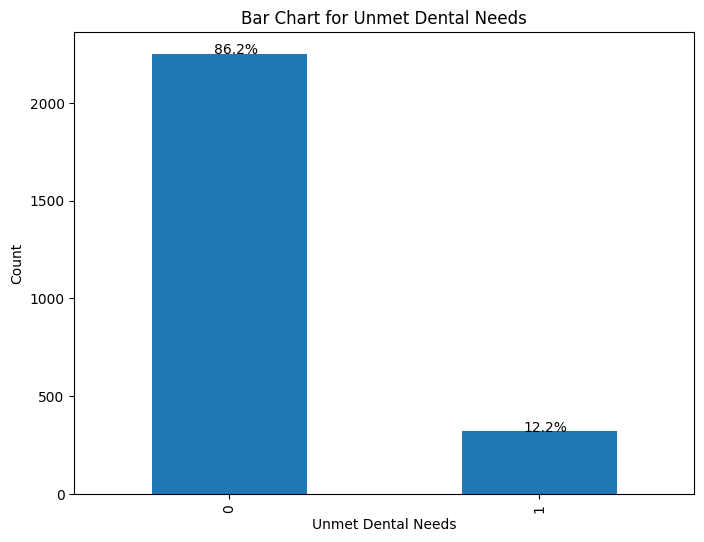

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Transportation (Medical)')

Text(0.5, 0, 'Transportation (Medical)')

Text(0, 0.5, 'Count')

Text(-0.05, 2058, '78.9%')

Text(0.95, 524, '20.1%')

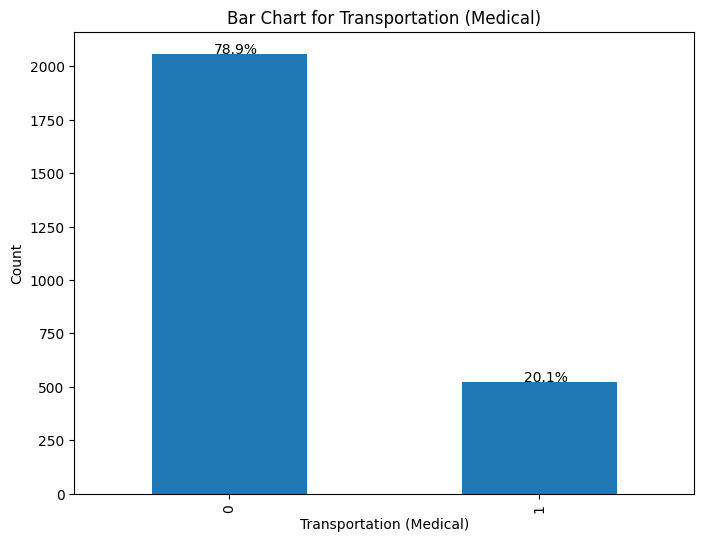

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Interpretation (Medical)')

Text(0.5, 0, 'Interpretation (Medical)')

Text(0, 0.5, 'Count')

Text(-0.05, 2096, '80.3%')

Text(0.95, 488, '18.7%')

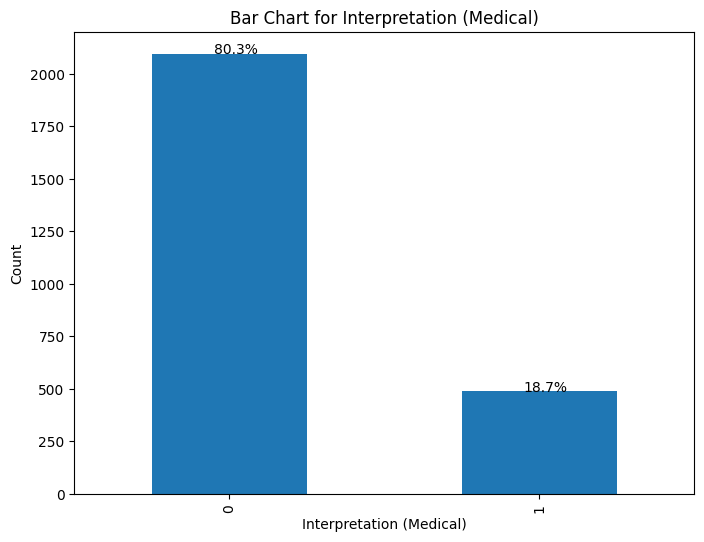

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Comunication Problem')

Text(0.5, 0, 'Comunication Problem')

Text(0, 0.5, 'Count')

Text(-0.05, 1834, '70.3%')

Text(0.95, 746, '28.6%')

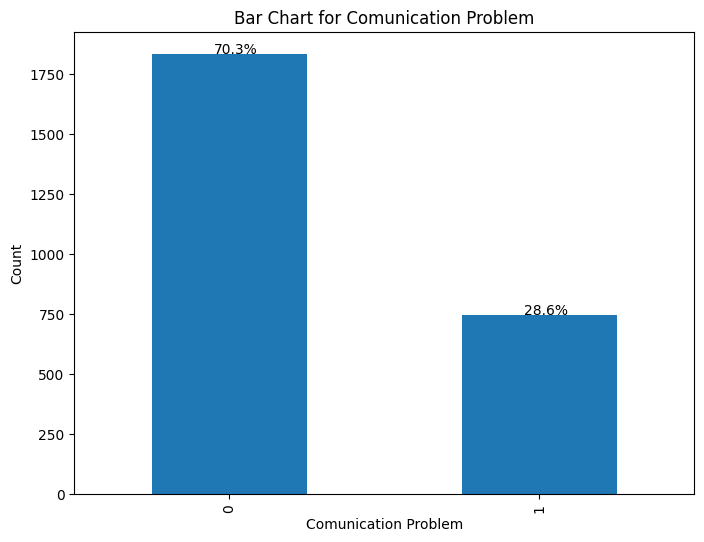

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Preferance')

Text(0.5, 0, 'Preferance')

Text(0, 0.5, 'Count')

Text(-0.05, 1311, '50.2%')

Text(0.95, 1235, '47.3%')

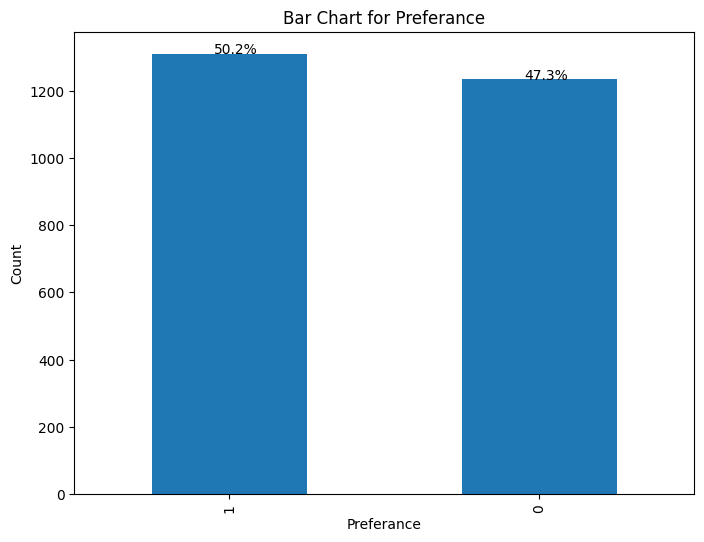

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Language')

Text(0.5, 0, 'Language')

Text(0, 0.5, 'Count')

Text(-0.05, 1210, '46.4%')

Text(0.95, 371, '14.2%')

Text(1.95, 366, '14.0%')

Text(2.95, 229, '8.8%')

Text(3.95, 215, '8.2%')

Text(4.95, 134, '5.1%')

Text(5.95, 58, '2.2%')

Text(6.95, 14, '0.5%')

Text(7.95, 10, '0.4%')

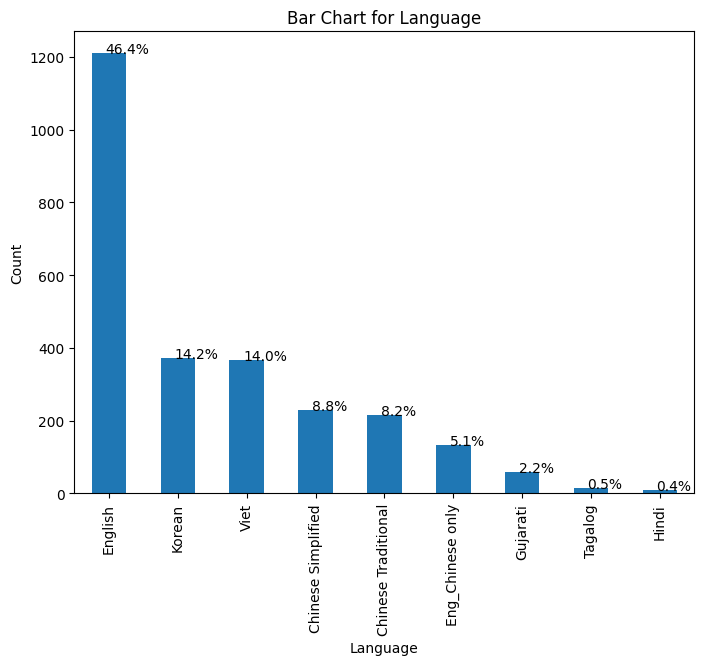

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Family')

Text(0.5, 0, 'Family')

Text(0, 0.5, 'Count')

Text(-0.05, 1331, '51.0%')

Text(0.95, 1258, '48.2%')

Text(1.95, 1, '0.0%')

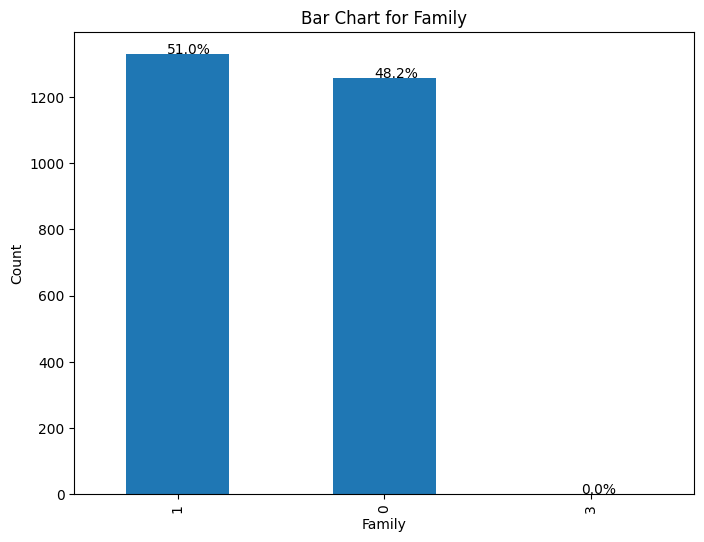

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Bar Chart for Satisfied With Life')

Text(0.5, 0, 'Satisfied With Life')

Text(0, 0.5, 'Count')

Text(-0.05, 984, '37.7%')

Text(0.95, 638, '24.5%')

Text(1.95, 439, '16.8%')

Text(2.95, 229, '8.8%')

Text(3.95, 145, '5.6%')

Text(4.95, 84, '3.2%')

Text(5.95, 40, '1.5%')

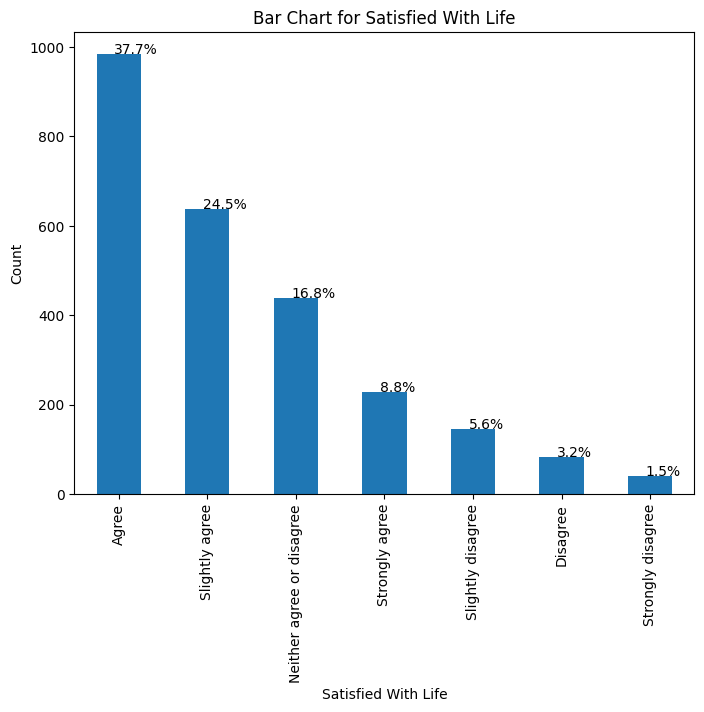

In [583]:
for col in df_analysis.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    ax = df_analysis[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add percentage labels to each bar
    total = len(df_analysis)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05  # Center the text
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10)

    plt.show()

In [584]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey ID                       2609 non-null   int64  
 1   Age                             2609 non-null   int64  
 2   Gender                          2582 non-null   object 
 3   Ethnicity                       2607 non-null   object 
 4   Marital Status                  2591 non-null   object 
 5   Education Completed             2572 non-null   float64
 6   Household Size                  2592 non-null   float64
 7   No One                          2604 non-null   float64
 8   Spouse                          2604 non-null   float64
 9   Children                        2604 non-null   float64
 10  Grand Children                  2604 non-null   float64
 11  Parent                          2604 non-null   float64
 12  Grandparent                     25

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Gender Distribution')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

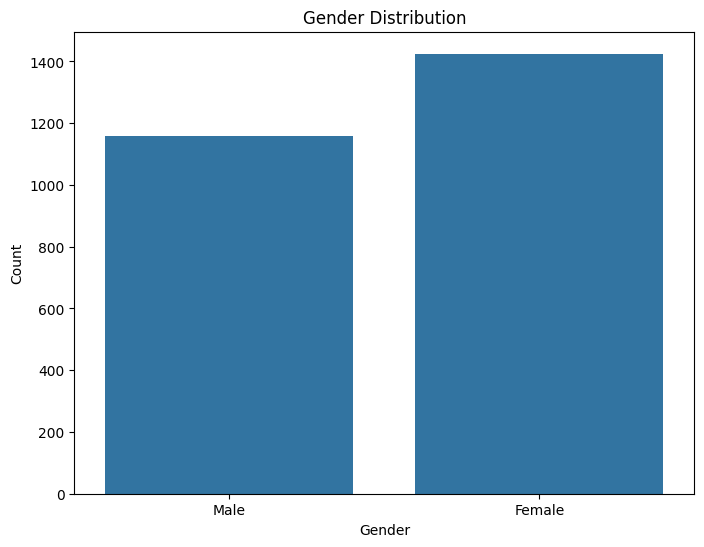

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

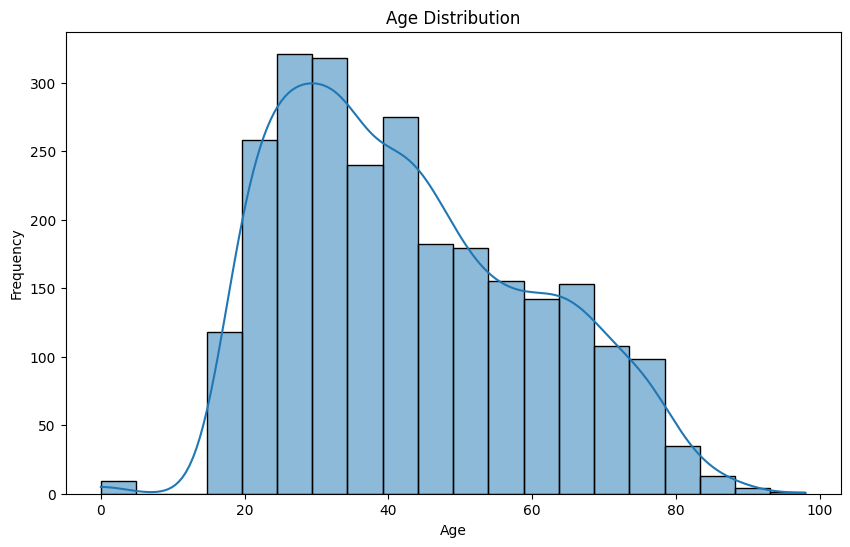

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution by Gender')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

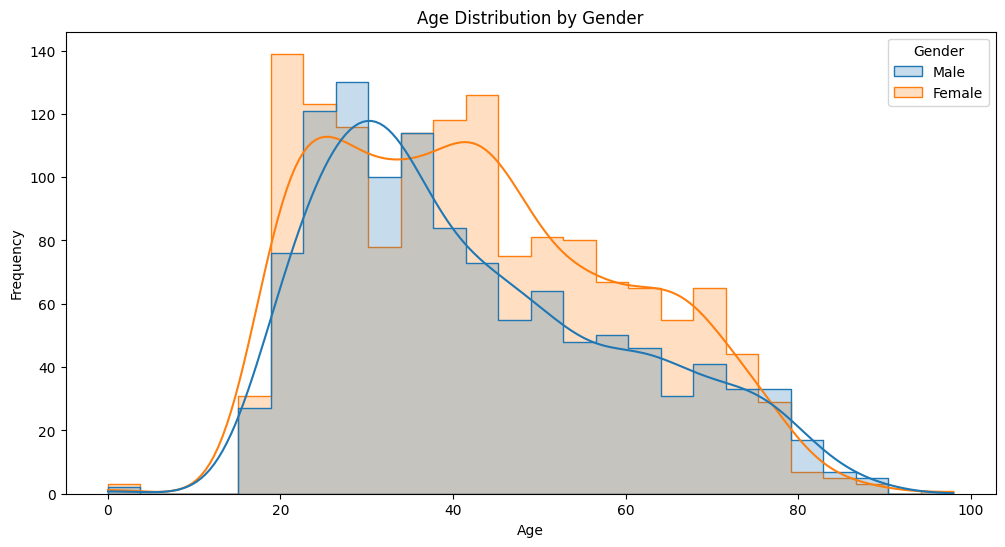

In [585]:
#1. What is the age and gender distribution of the respondents?

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_analysis)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Age'], bins=20, kde=True) # Increased bins for better visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Combined plot for age and gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df_analysis, x='Age', hue='Gender', kde=True, element="step")
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age Distribution by Gender:

General Pattern: The age distribution for both males and females is right-skewed, with the majority of respondents in the younger age brackets (20–40 years old).

Gender Differences: Female respondents slightly outnumber males in almost every age group, especially between ages 20 and 40.

Peak Ages: Both genders show a peak in frequency in the 20–30 age range. After this, the number of respondents in each successive age group gradually decreases.

Older Age Groups: There are fewer respondents in the older age brackets (above 60), but females remain more represented than males even in these older groups.

Overall: The dataset is predominantly composed of young to middle-aged adults, with a higher proportion of females than males across nearly all age groups.

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Most Common Living Arrangements')

Text(0.5, 0, 'Living Arrangement')

Text(0, 0.5, 'Number of Respondents')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'No One'),
  Text(1, 0, 'Spouse'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Grand Children'),
  Text(4, 0, 'Brother/Sister'),
  Text(5, 0, 'Other Relative'),
  Text(6, 0, 'Grandparent'),
  Text(7, 0, 'Parent'),
  Text(8, 0, 'Friends')])

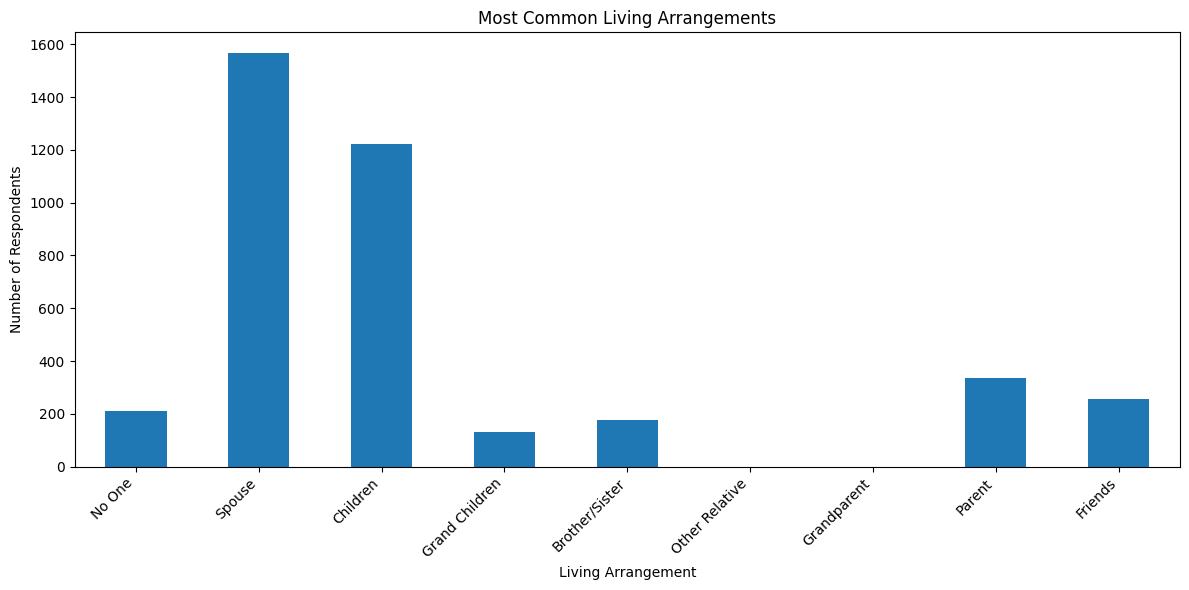

No One             212.0
Spouse            1567.0
Children          1221.0
Grand Children     132.0
Brother/Sister     177.0
Other Relative       0.0
Grandparent          0.0
Parent             335.0
Friends            255.0
dtype: float64

In [586]:
#2. What are the most common living arrangements among respondents?

living_arrangement_sums = df_analysis[col_living].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
living_arrangement_sums.plot(kind='bar')
plt.title('Most Common Living Arrangements')
plt.xlabel('Living Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Print the sums for a more precise view
living_arrangement_sums


Most Common Living Arrangements:

Most Common Arrangements:

The majority of respondents live with their spouse and/or children, making these the most prevalent living arrangements.

Living with parents is also common, followed by living with friends or roommates, and with siblings.

Less Common Arrangements:

Fewer respondents report living with grandchildren, other relatives, or living alone.

Rare Arrangements:

Living with grandparents or other relatives is very rare in this sample.

Observation:

The data suggests that family-oriented living arrangements (spouse, children, parents) are dominant, while single-person or non-family arrangements are much less common.

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Employment Status')

Text(0.5, 0, 'Employment Status')

Text(0, 0.5, 'Number of Respondents')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Full Time Employment'),
  Text(1, 0, 'Part Time Employment'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Homemaker'),
  Text(4, 0, 'Retired')])

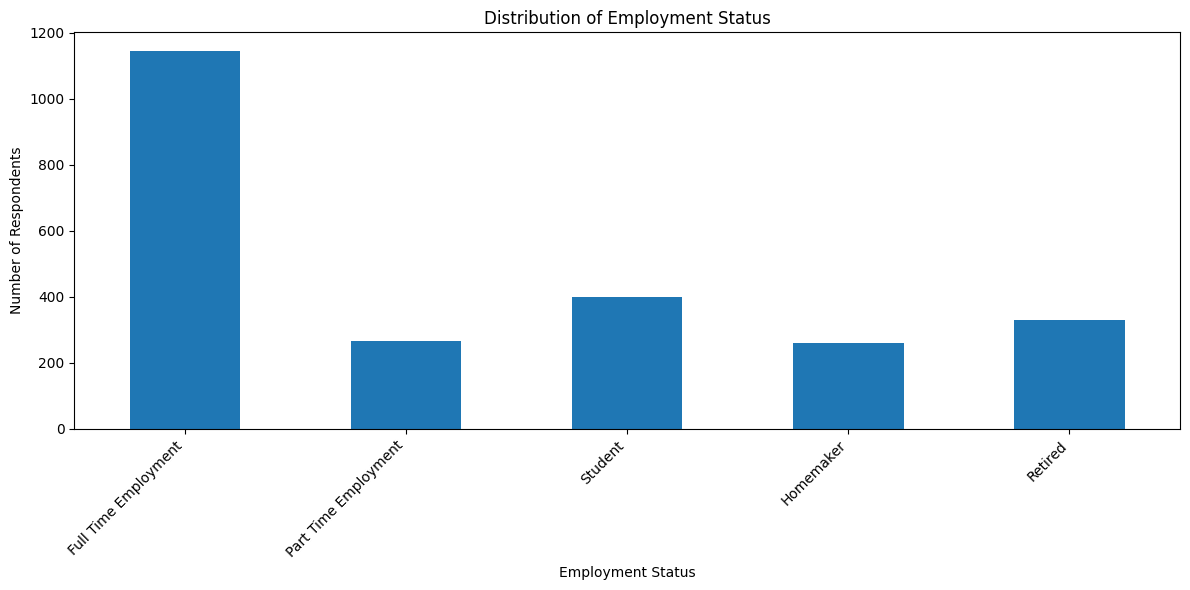

Full Time Employment    1144.0
Part Time Employment     266.0
Student                  400.0
Homemaker                259.0
Retired                  330.0
dtype: float64


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Occupation'>

Text(0.5, 1.0, 'Distribution of Occupation Types')

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Number of Respondents')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Professional'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Manager, executive, or official'),
  Text(3, 0, 'Service worker'),
  Text(4, 0, 'Clerical, office, sales'),
  Text(5, 0, 'Business owner'),
  Text(6, 0, 'Skilled trades'),
  Text(7, 0, 'Semi-skilled'),
  Text(8, 0, '0')])

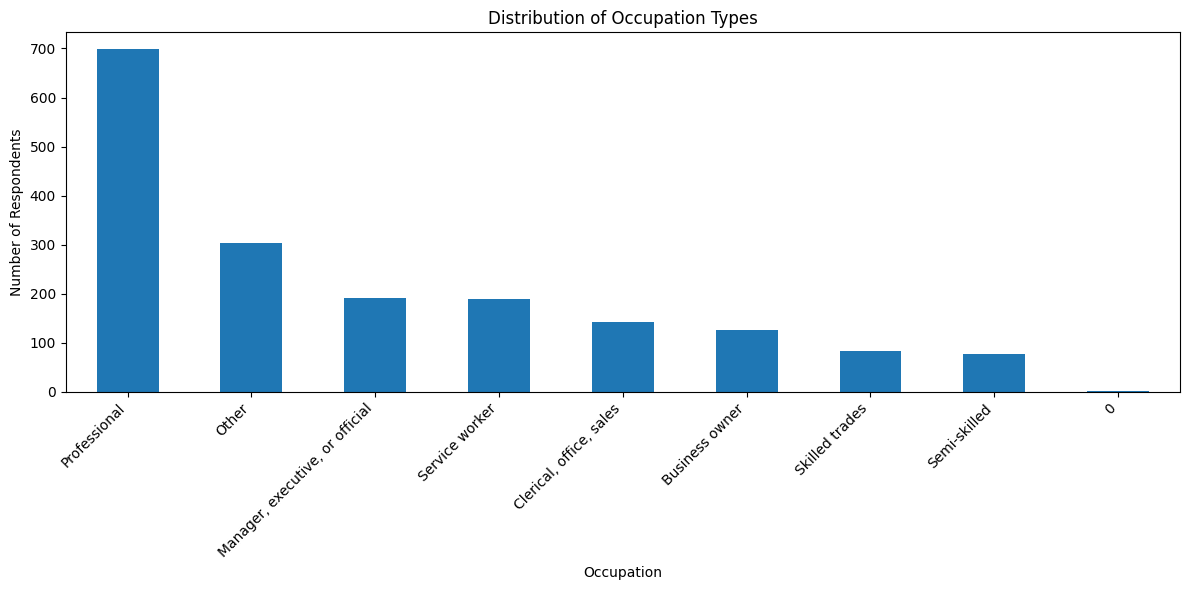

Occupation
Professional                       698
Other                              304
Manager, executive, or official    191
Service worker                     190
Clerical, office, sales            143
Business owner                     127
Skilled trades                      83
Semi-skilled                        77
0                                    1
Name: count, dtype: int64


In [587]:
# 3. What is the distribution of employment status and occupation types in the dataset?

employment_status_cols = ['Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker', 'Retired']
employment_status_counts = df_analysis[employment_status_cols].sum()

plt.figure(figsize=(12, 6))
employment_status_counts.plot(kind='bar')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(employment_status_counts)

# Analyze occupation types (assuming 'Occupation' column exists; replace if needed)
if 'Occupation' in df_analysis.columns:
    occupation_counts = df_analysis['Occupation'].value_counts()
    plt.figure(figsize=(12, 6))
    occupation_counts.plot(kind='bar')
    plt.title('Distribution of Occupation Types')
    plt.xlabel('Occupation')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(occupation_counts)
else:
    print("No 'Occupation' column found in the DataFrame.")

Employment Status:

The majority of respondents are employed full-time (1144).

There are smaller but notable numbers of part-time employees (266), students (400), homemakers (259), and retired individuals (330).

Occupation:

A large number of respondents work in professional occupations (698).

"Other" is the second most frequent category (304), which suggests a variety of jobs not captured by the other categories.

Summary:

The data indicates a workforce primarily engaged in full-time professional roles. There is also a significant presence of individuals in service, management, and clerical positions. The "Other" category suggests a diverse range of occupations that may warrant further investigation.

count                 2406
unique                   8
top       $70,000 and over
freq                   993
Name: Income, dtype: object


<Axes: xlabel='Income'>

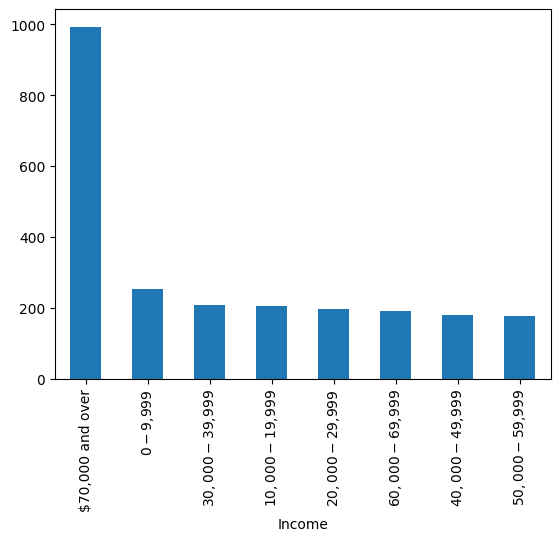

In [588]:
# 4. What is the range of annual household incomes reported by the respondents?

income_range = df_analysis['Income'].describe()
print(income_range)

df['Income'].value_counts().plot(kind='bar')

The income category "$70,000 and over" is the most prevalent.

The "$0 - $9,999" income bracket is the second most frequent.

The other income brackets, "$30,000 - $39,999", "$10,000 - $19,999", "$20,000 - $29,999", "$60,000 - $69,999", "$40,000 - $49,999", and "$50,000 - $59,999", have similar, lower frequencies compared to the top two categories.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Present Health', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Present Health')

Text(0.5, 0, 'Present Health')

Text(0, 0.5, 'Frequency')

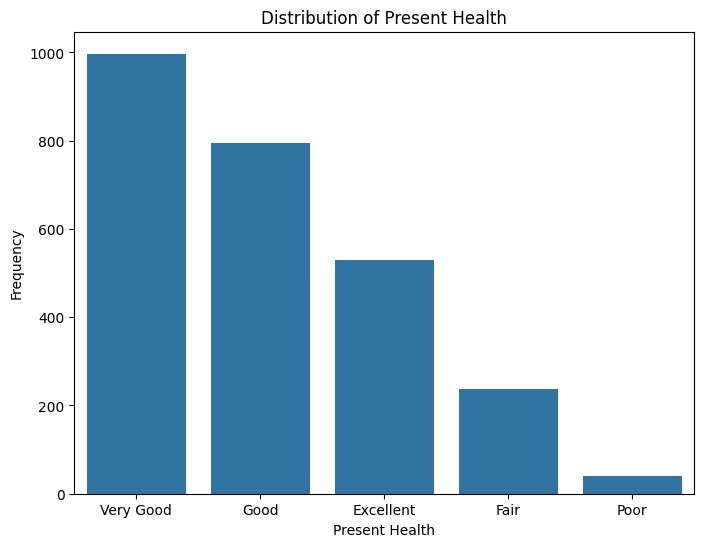

count          2599
unique            5
top       Very Good
freq            997
Name: Present Health, dtype: object


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Present Mental Health', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Present Mental Health')

Text(0.5, 0, 'Present Mental Health')

Text(0, 0.5, 'Frequency')

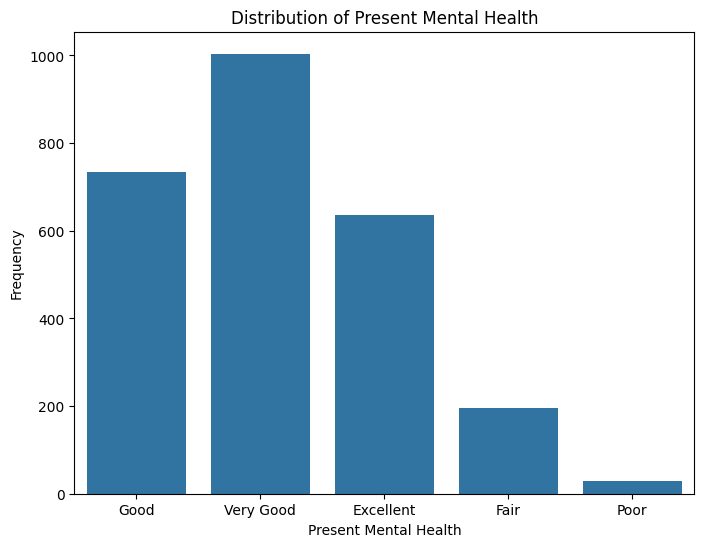

count          2596
unique            5
top       Very Good
freq           1004
Name: Present Mental Health, dtype: object


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Present Oral Health', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Present Oral Health')

Text(0.5, 0, 'Present Oral Health')

Text(0, 0.5, 'Frequency')

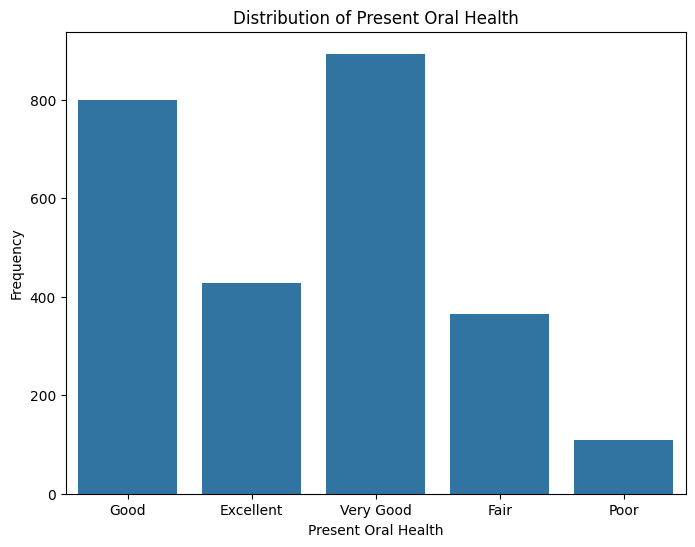

count          2593
unique            5
top       Very Good
freq            893
Name: Present Oral Health, dtype: object


In [589]:
# 5. How do respondents rate their overall well-being and satisfaction with life?
wellbeing_columns = ['Present Health','Present Mental Health','Present Oral Health']  # Replace with actual column names

for col in wellbeing_columns:
    if col in df_analysis.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df_analysis)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        print(df_analysis[col].describe())
    else:
        print(f"{col} column not found in the DataFrame.")

In [590]:
df_analysis= df_analysis.drop(['Grandparent','Other Relative'], axis=1)
# As all values are 0 which means No

In [591]:
df_analysis.info()
df_analysis.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey ID                       2609 non-null   int64  
 1   Age                             2609 non-null   int64  
 2   Gender                          2582 non-null   object 
 3   Ethnicity                       2607 non-null   object 
 4   Marital Status                  2591 non-null   object 
 5   Education Completed             2572 non-null   float64
 6   Household Size                  2592 non-null   float64
 7   No One                          2604 non-null   float64
 8   Spouse                          2604 non-null   float64
 9   Children                        2604 non-null   float64
 10  Grand Children                  2604 non-null   float64
 11  Parent                          2604 non-null   float64
 12  Brother/Sister                  26

Index(['Survey ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Completed', 'Household Size', 'No One', 'Spouse', 'Children',
       'Grand Children', 'Parent', 'Brother/Sister', 'Friends', 'Religion',
       'Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker',
       'Retired', 'Occupation', 'Income', 'Achieving Ends Meet', 'US Born',
       'Duration of Residency', 'Primary Language', 'English Speaking',
       'English Difficulties', 'Familiarity with America',
       'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging',
       'Present Health', 'Present Mental Health', 'Present Oral Health',
       'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise',
       'Healthy Diet', 'Hypertension', 'Diabetes', 'Arthritis',
       'Physical Check-up', 'Dentist Check-up', 'Urgentcare', 'Folkmedicine',
       'Primary Care', 'Health Insurance', 'Dental Insurance',
       'Unmet Health Need', 'Unmet Dental Needs', 'Transportati

In [592]:
df_analysis['Satisfied With Life'] = df_analysis['Satisfied With Life'].replace(['Strongly agree', 'Slightly agree'], 'Agree')
df_analysis['Satisfied With Life'] = df_analysis['Satisfied With Life'].replace(['Strongly disagree', 'Slightly disagree'], 'Disagree')
df_analysis['Satisfied With Life'].value_counts()
df_analysis['Satisfied With Life'].isnull().sum()

Satisfied With Life
Agree                        1851
Neither agree or disagree     439
Disagree                      269
Name: count, dtype: int64

np.int64(50)

In [593]:
df_analysis = df_analysis.dropna()

In [594]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'Ethnicity', 'Marital Status','Language','Present Health','Present Mental Health','Present Oral Health','Occupation','Belonging','Identify Ethnically','Familiarity with America','Familiarity with Ethnic Origin','English Difficulties','English Speaking','Religion','Marital Status','Satisfied With Life','Income']
for col in cols:
    le = LabelEncoder()
    df_analysis[col] = le.fit_transform(df_analysis[col])

<ipython-input-594-7c2c0c580066>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis[col] = le.fit_transform(df_analysis[col])
<ipython-input-594-7c2c0c580066>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis[col] = le.fit_transform(df_analysis[col])
<ipython-input-594-7c2c0c580066>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<Figure size 5000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

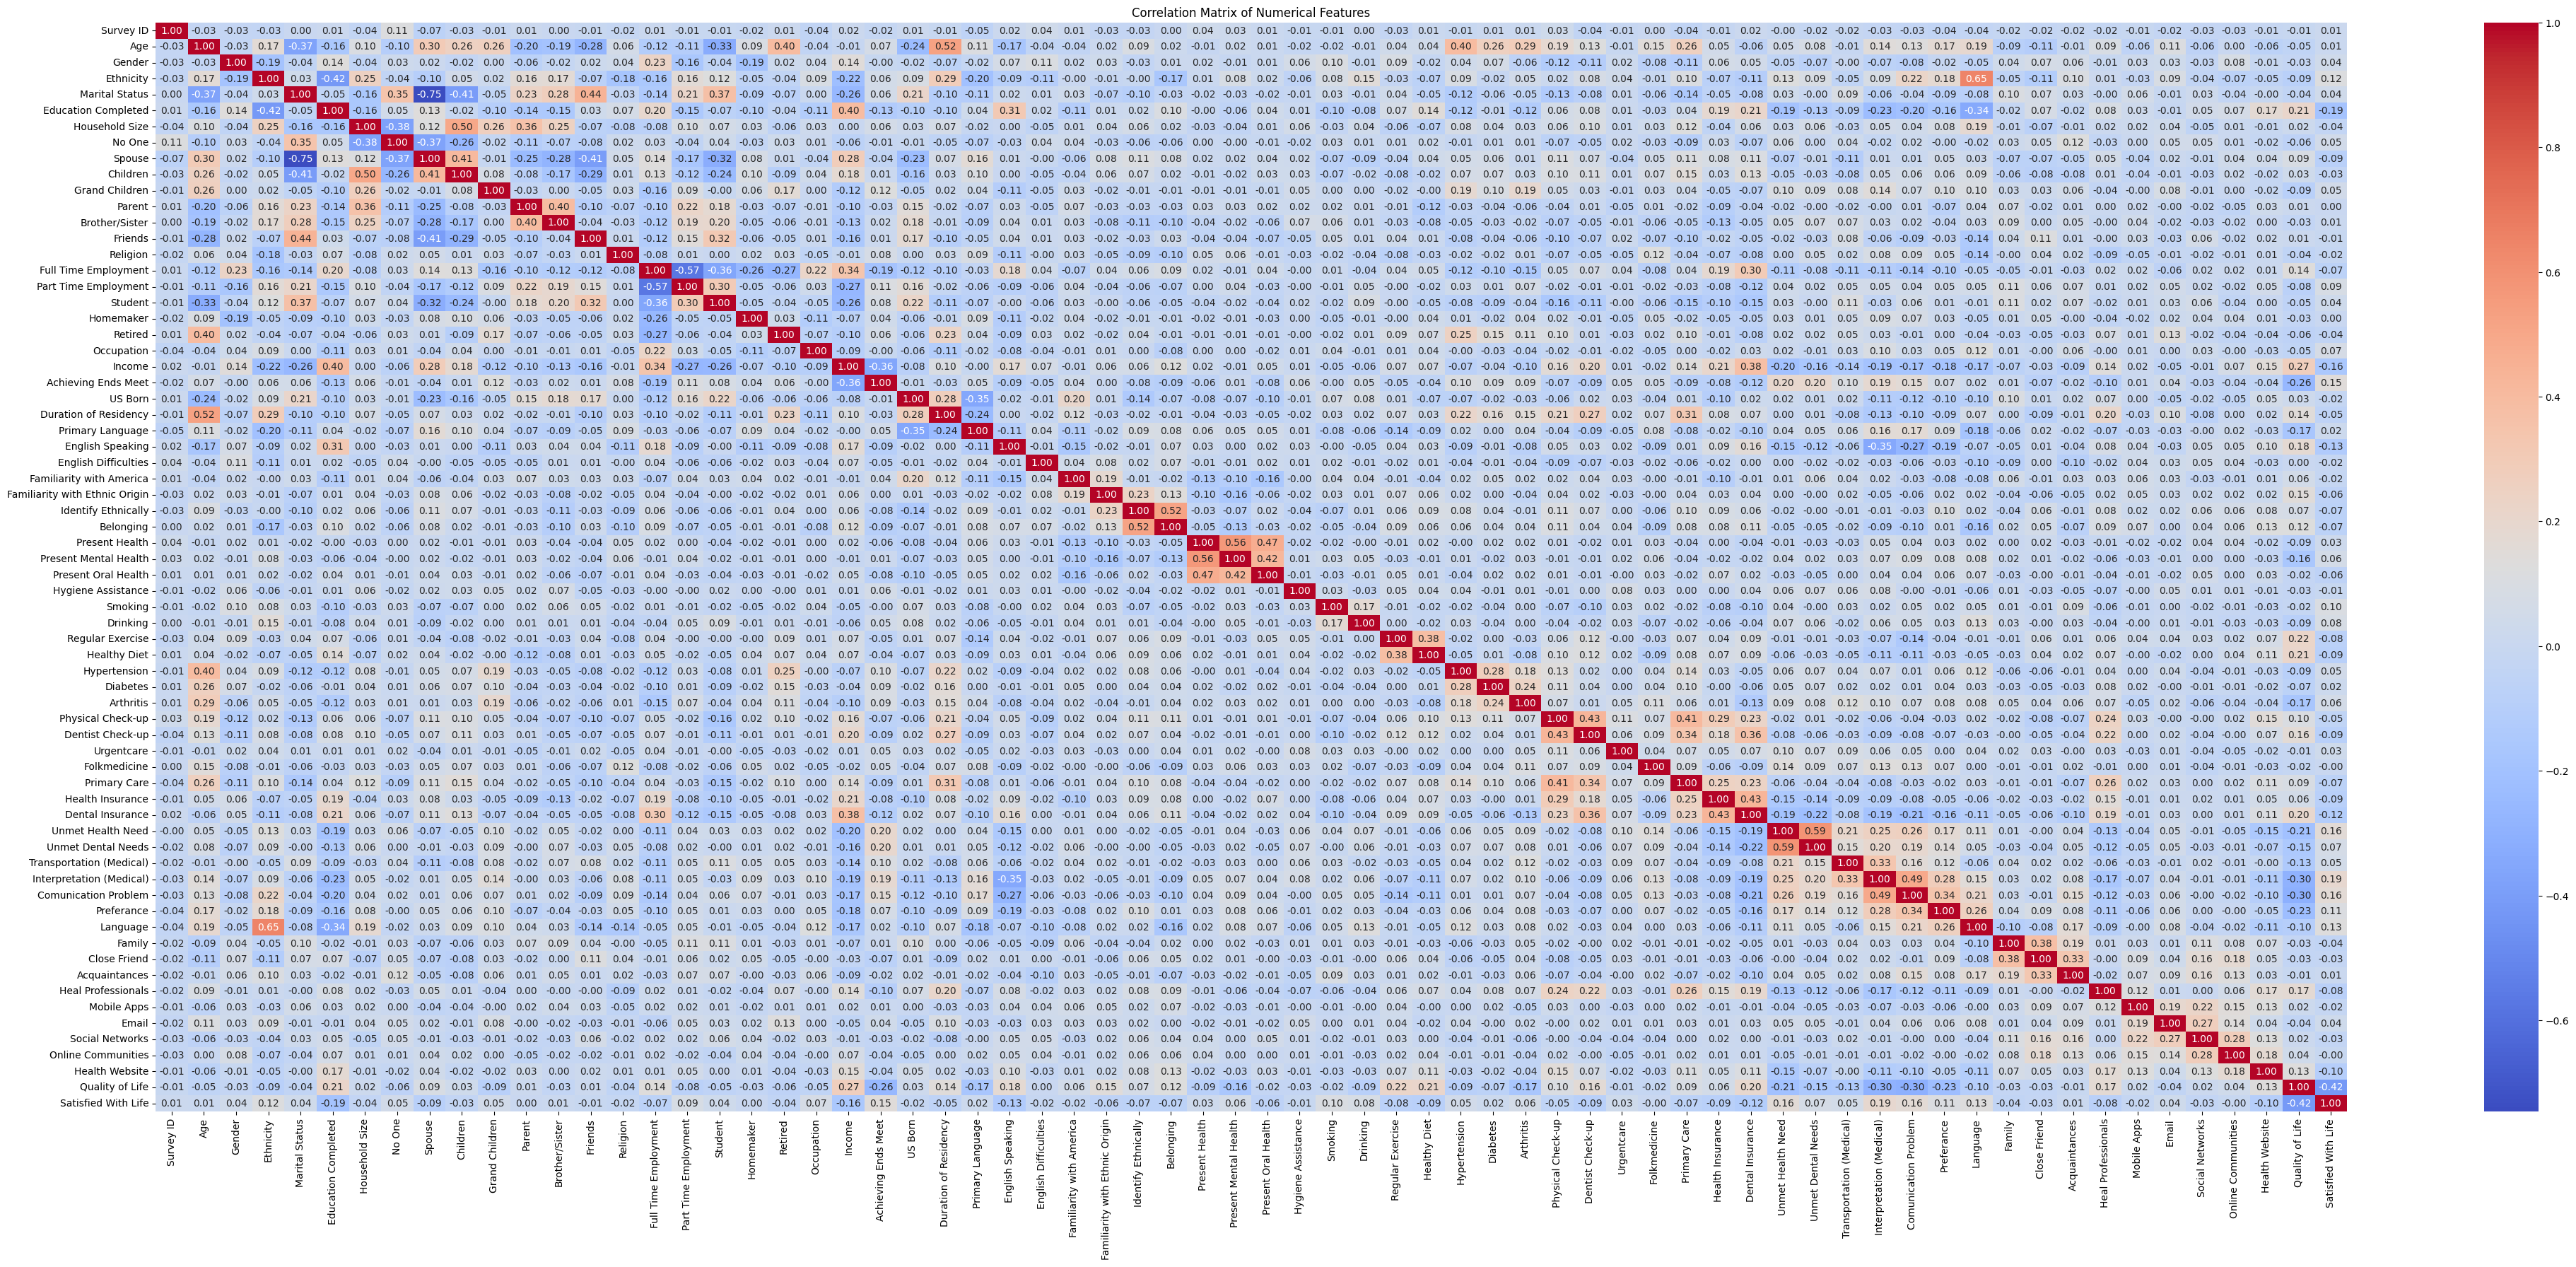

In [595]:
correlation_matrix = df_analysis.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(50,20))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [596]:
correlation_matrix = df_analysis.corr()

# Focus on the correlation with 'Satisfied With Life'
satisfied_with_life_correlation = correlation_matrix['Satisfied With Life'].sort_values(ascending=False)

satisfied_with_life_correlation.head(30)
satisfied_with_life_correlation.tail(38)

Satisfied With Life         1.000000
Interpretation (Medical)    0.192781
Comunication Problem        0.161720
Unmet Health Need           0.155150
Achieving Ends Meet         0.146387
Language                    0.127438
Ethnicity                   0.117794
Preferance                  0.110162
Smoking                     0.104056
Part Time Employment        0.085862
Drinking                    0.083594
Occupation                  0.072778
Unmet Dental Needs          0.070379
Present Mental Health       0.063531
Arthritis                   0.060603
Transportation (Medical)    0.052320
Grand Children              0.051588
No One                      0.050421
Hypertension                0.049847
Marital Status              0.042584
Gender                      0.040335
Email                       0.035719
Student                     0.035155
Urgentcare                  0.033574
Present Health              0.028068
Diabetes                    0.023457
Primary Language            0.019698
Survey ID                   0.011302
Acquaintances               0.008039
Age                         0.006483
Name: Satisfied With Life, dtype: float64

Brother/Sister                    0.005929
Homemaker                         0.002914
Parent                            0.000725
Folkmedicine                     -0.002136
Online Communities               -0.004581
Friends                          -0.008597
Hygiene Assistance               -0.008762
English Difficulties             -0.015910
Familiarity with America         -0.016365
Religion                         -0.017543
US Born                          -0.020056
Mobile Apps                      -0.022257
Close Friend                     -0.028264
Children                         -0.033271
Social Networks                  -0.034810
Household Size                   -0.035727
Family                           -0.037073
Retired                          -0.039550
Physical Check-up                -0.049019
Duration of Residency            -0.050579
Present Oral Health              -0.059430
Familiarity with Ethnic Origin   -0.063015
Identify Ethnically              -0.065089
Primary Care                     -0.065955
Full Time Employment             -0.068473
Belonging                        -0.069713
Regular Exercise                 -0.076602
Heal Professionals               -0.081051
Healthy Diet                     -0.085083
Spouse                           -0.085755
Health Insurance                 -0.086973
Dentist Check-up                 -0.089519
Health Website                   -0.103986
Dental Insurance                 -0.118511
English Speaking                 -0.127565
Income                           -0.158030
Education Completed              -0.191304
Quality of Life                  -0.423058
Name: Satisfied With Life, dtype: float64

In [597]:
X = df_analysis.drop('Satisfied With Life', axis=1)
y = df_analysis['Satisfied With Life']

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [599]:
# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

RandomForestClassifier(random_state=42)

Accuracy: 0.7553648068669528
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       178
           1       0.00      0.00      0.00        28
           2       0.29      0.15      0.20        27

    accuracy                           0.76       233
   macro avg       0.36      0.37      0.35       233
weighted avg       0.63      0.76      0.68       233



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [600]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(classification_report(y_test, gb_y_pred))

GradientBoostingClassifier(random_state=42)

Gradient Boosting Accuracy: 0.7682403433476395
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       178
           1       0.60      0.11      0.18        28
           2       0.35      0.26      0.30        27

    accuracy                           0.77       233
   macro avg       0.59      0.44      0.45       233
weighted avg       0.73      0.77      0.73       233



In [601]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_y_pred))


DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.6695278969957081
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       178
           1       0.28      0.18      0.22        28
           2       0.16      0.22      0.19        27

    accuracy                           0.67       233
   macro avg       0.42      0.41      0.41       233
weighted avg       0.67      0.67      0.67       233



In [602]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
logreg_y_pred = logreg_model.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(classification_report(y_test, logreg_y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.7639484978540773
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       178
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        27

    accuracy                           0.76       233
   macro avg       0.25      0.33      0.29       233
weighted avg       0.58      0.76      0.66       233



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve for all Models (Class 0)')

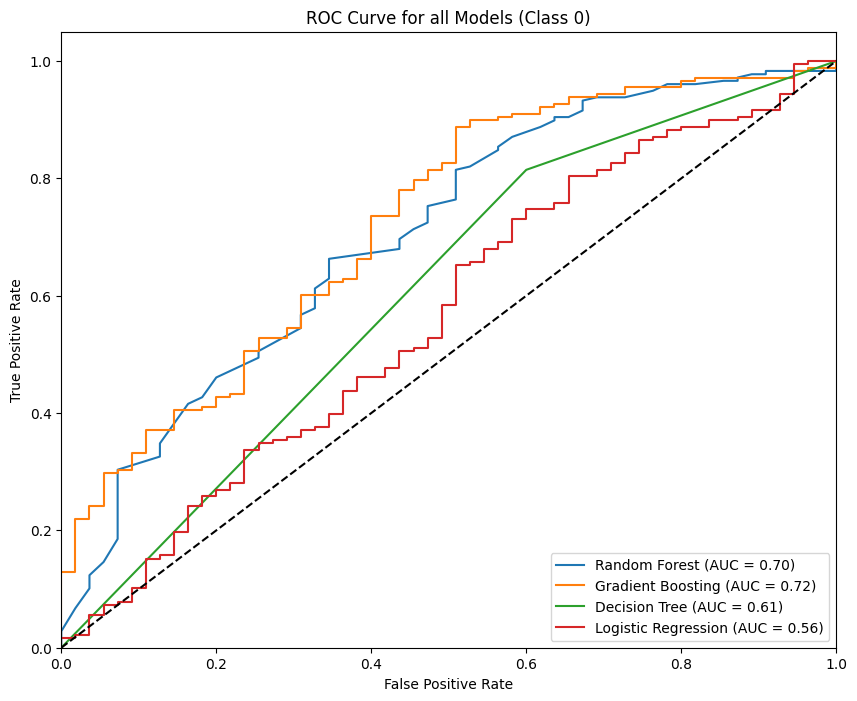

In [603]:
# prompt: Roc curve for all the models with class of interest is 0

from sklearn.metrics import roc_curve, auc

models = {
    "Random Forest": model,
    "Gradient Boosting": gb_model,
    "Decision Tree": dt_model,
    "Logistic Regression": logreg_model
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 0]  # Probability of class 0
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=0)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models (Class 0)')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting and Logistic Regression models have the highest accuracy. The decision tree model has the lowest accuracy.

The Gradient Boosting model has the highest AUC score, 0.72. A higher AUC indicates better performance.